# SMARTPHONE ANALYSIS



> Dataset

In this case study we are analyzing the best price of a mobile phone based on other features like brand name, memory size, battery size, os, screen size.

**Exploring dataset**

The dataset set contains data about the mobile phones. Dataset contains the model name, brand name and operating system of the phone and it's popularity. It also has it's financial characteristics like lowest/highest/best price. And some of the characteristics like screen/battery size, memory amount and release date. 

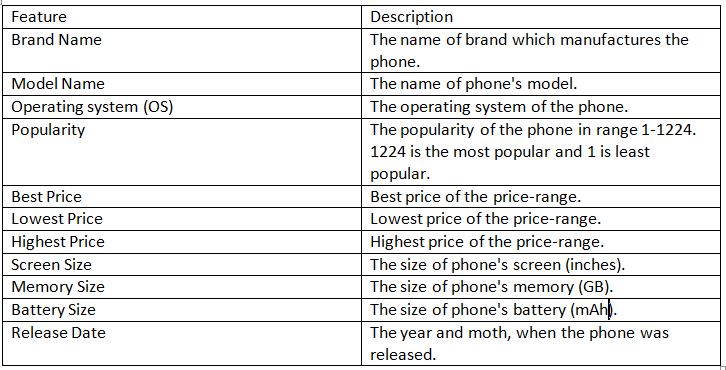

**Import all required packages**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as st
import matplotlib.pyplot as pyplot
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import neighbors
from scipy import stats
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from random import sample

In [4]:
df= pd.read_csv('/content/smart phone.csv')
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529.0,1819.0,5.00,8.0,2000.0,Oct-20
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659.0,2489.0,5.00,16.0,2000.0,Sep-20
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659.0,2489.0,5.00,16.0,2000.0,Sep-20
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659.0,2489.0,5.00,16.0,2000.0,Sep-20
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999,NaN,NaN,5.71,16.0,3000.0,Apr-20
...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685,16018.0,27900.0,6.50,64.0,3174.0,Sep-18
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600,21939.0,33720.0,6.50,64.0,3174.0,Sep-18
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804,7999.0,9999.0,6.26,128.0,3750.0,Nov-19
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755,18500.0,19010.0,6.65,128.0,4500.0,Oct-20


In [5]:
df.shape

(1224, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand_name     1224 non-null   object 
 1   model_name     1224 non-null   object 
 2   os             1027 non-null   object 
 3   popularity     1224 non-null   int64  
 4   best_price     1224 non-null   int64  
 5   lowest_price   964 non-null    float64
 6   highest_price  964 non-null    float64
 7   screen_size    1222 non-null   float64
 8   memory_size    1112 non-null   float64
 9   battery_size   1214 non-null   float64
 10  release_date   1224 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 105.3+ KB


# PREPROCESSING

In [7]:
df.dtypes

brand_name        object
model_name        object
os                object
popularity         int64
best_price         int64
lowest_price     float64
highest_price    float64
screen_size      float64
memory_size      float64
battery_size     float64
release_date      object
dtype: object

In [8]:
df.describe()

,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,964.000000,964.000000,1222.000000,1112.000000,1214.000000
mean,612.500000,7941.206699,7716.018672,9883.410788,5.394378,95.700059,3608.201812
std,353.482673,8891.836260,8560.959059,11514.936818,1.476991,111.922576,1668.268774
min,1.000000,214.000000,198.000000,229.000000,1.400000,0.003200,460.000000
25%,306.750000,2599.750000,2399.000000,2887.000000,5.162500,32.000000,2900.000000
50%,612.500000,4728.000000,4574.000000,5325.500000,6.000000,64.000000,3687.000000
75%,918.250000,9323.000000,9262.250000,12673.750000,6.400000,128.000000,4400.000000
max,1224.000000,56082.000000,49999.000000,69999.000000,8.100000,1000.000000,18800.000000


In [9]:
df.isnull().sum()

brand_name         0
model_name         0
os               197
popularity         0
best_price         0
lowest_price     260
highest_price    260
screen_size        2
memory_size      112
battery_size      10
release_date       0
dtype: int64



> **OUTLIERS**



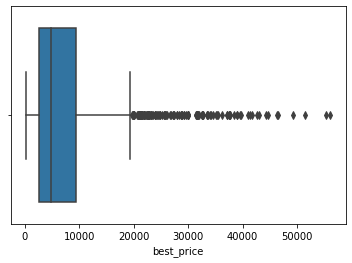

In [10]:
ax = sns.boxplot(x='best_price',data = df)
ax.set_ylabel(None);
ax.set_xlabel('best_price');

There are outliers present in best_price after the range of 20000

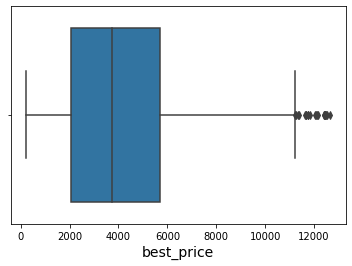

In [11]:
q1 = df.best_price.quantile(0.25)
q2 = df.best_price.quantile(0.50)
q3 = df.best_price.quantile(0.75)
min = df['best_price'].min()
max = df['best_price'].max()
iqr = q3-q1
min = q1-(iqr*1.5)
max = q1+(iqr*1.5)
data = df['best_price'].values
index = df['best_price'].index
df = df.drop(index[np.where((data>max) | (data<min))])
ax = sns.boxplot (x = 'best_price', data = df)
ax.set_ylabel (None);
ax.set_xlabel('best_price', fontsize=14);

Still there are some outliers present in best_price after the range of 11000

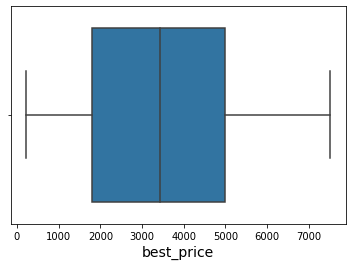

In [12]:
q1 = df.best_price.quantile(0.25)
q2 = df.best_price.quantile(0.50)
q3 = df.best_price.quantile(0.75)
min = df['best_price'].min()
max = df['best_price'].max()
iqr = q3-q1
min = q1-(iqr*1.5)
max = q1+(iqr*1.5)
data = df['best_price'].values
index = df['best_price'].index
df = df.drop(index[np.where((data>max) | (data<min))])
ax = sns.boxplot (x = 'best_price', data = df)
ax.set_ylabel (None);
ax.set_xlabel('best_price', fontsize=14);

Finally all the outliers are removed for the column named best_price.

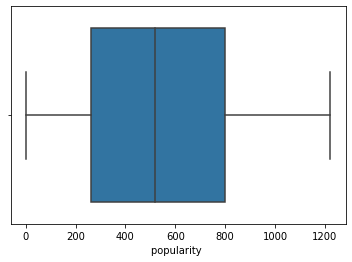

In [13]:
ax = sns.boxplot(x='popularity',data = df)
ax.set_ylabel(None);
ax.set_xlabel('popularity ');

There are no outliers for popularity.

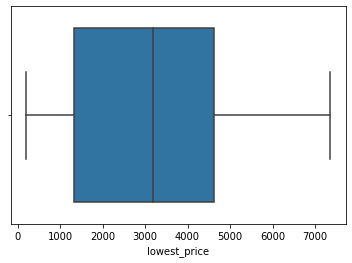

In [14]:
ax = sns.boxplot(x='lowest_price',data = df)
ax.set_ylabel(None);
ax.set_xlabel('lowest_price');

There are no outliers for lowest price.

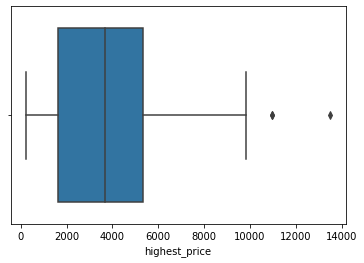

In [15]:
ax = sns.boxplot(x='highest_price',data = df)
ax.set_ylabel(None);
ax.set_xlabel('highest_price');

From the above box plot we can see that the outliers are present after the range of 10000

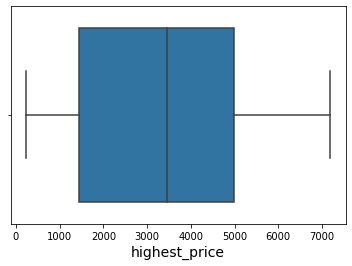

In [16]:
q1 = df.highest_price.quantile(0.25)
q2 = df.highest_price.quantile(0.50)
q3 = df.highest_price.quantile(0.75)
min = df['highest_price'].min()
max = df['highest_price'].max()
iqr = q3-q1
min = q1-(iqr*1.5)
max = q1+(iqr*1.5)
data = df['highest_price'].values
index = df['highest_price'].index
df = df.drop(index[np.where((data>max) | (data<min))])
ax = sns.boxplot (x = 'highest_price', data = df)
ax.set_ylabel (None);
ax.set_xlabel('highest_price', fontsize=14);

Finally all the outliers are removed for the column named highest_price

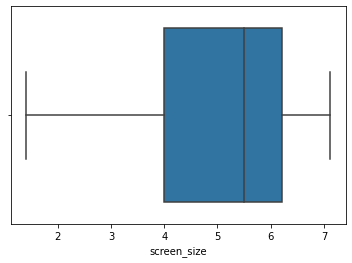

In [17]:
ax = sns.boxplot(x='screen_size',data = df)
ax.set_ylabel(None);
ax.set_xlabel('screen_size');

No outliers for screen size

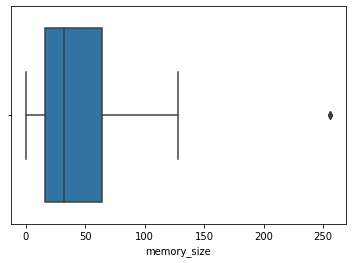

In [18]:
ax = sns.boxplot(x='memory_size',data = df)
ax.set_ylabel(None);
ax.set_xlabel('memory_size');

From the above box plot we can see that the outliers are present after the range of 125.

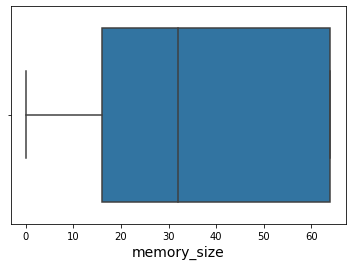

In [19]:
q1 = df.memory_size.quantile(0.25)
q2 = df.memory_size.quantile(0.50)
q3 = df.memory_size.quantile(0.75)
min = df['memory_size'].min()
max = df['memory_size'].max()
iqr = q3-q1
min = q1-(iqr*1.5)
max = q1+(iqr*1.5)
data = df['memory_size'].values
index = df['memory_size'].index
df = df.drop(index[np.where((data>max) | (data<min))])
ax = sns.boxplot (x = 'memory_size', data = df)
ax.set_ylabel (None);
ax.set_xlabel('memory_size', fontsize=14);

Finally all the outliers are removed for the column named memory_size

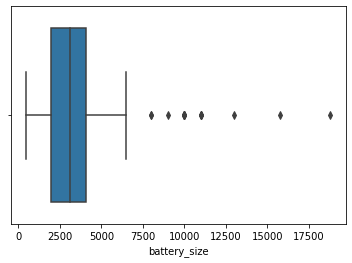

In [20]:
ax = sns.boxplot(x='battery_size',data = df)
ax.set_ylabel(None);
ax.set_xlabel('battery_size');

From the above box plot we can see that the outliers are present after the range of 6500

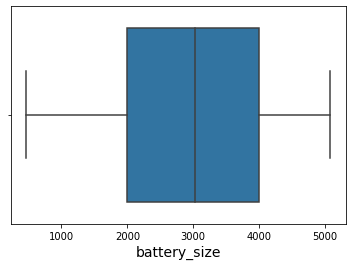

In [21]:
q1 = df.battery_size.quantile(0.25)
q2 = df.battery_size.quantile(0.50)
q3 = df.battery_size.quantile(0.75)
min = df['battery_size'].min()
max = df['battery_size'].max()
iqr = q3-q1
min = q1-(iqr*1.5)
max = q1+(iqr*1.5)
data = df['battery_size'].values
index = df['battery_size'].index
df = df.drop(index[np.where((data>max) | (data<min))])
ax = sns.boxplot (x = 'battery_size', data = df)
ax.set_ylabel (None);
ax.set_xlabel('battery_size', fontsize=14);

Finally all the outliers are removed for the column named battery_size.

In [22]:
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529.0,1819.0,5.00,8.0,2000.0,Oct-20
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659.0,2489.0,5.00,16.0,2000.0,Sep-20
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659.0,2489.0,5.00,16.0,2000.0,Sep-20
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659.0,2489.0,5.00,16.0,2000.0,Sep-20
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999,NaN,NaN,5.71,16.0,3000.0,Apr-20
...,...,...,...,...,...,...,...,...,...,...,...
1170,Apple,iPhone 6 Plus 16GB (Silver),iOS,313,5242,5239.0,5248.0,5.50,16.0,2915.0,Sep-14
1171,Apple,iPhone 6 Plus 64GB Space Gray (MGAH2),iOS,341,5889,5889.0,5890.0,5.50,64.0,2915.0,Sep-14
1174,Apple,iPhone 6s 16GB Space Gray (MKQJ2),iOS,640,5181,4899.0,5990.0,4.70,16.0,1715.0,Sep-15
1177,Apple,iPhone 6s Plus 16GB Space Gray (MKU12),iOS,489,6500,NaN,NaN,5.50,16.0,2915.0,Sep-15


In [23]:
df.reset_index(drop=True,inplace=True)

In [24]:
df.tail(5)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
680,Apple,iPhone 6 Plus 16GB (Silver),iOS,313,5242,5239.0,5248.0,5.5,16.0,2915.0,Sep-14
681,Apple,iPhone 6 Plus 64GB Space Gray (MGAH2),iOS,341,5889,5889.0,5890.0,5.5,64.0,2915.0,Sep-14
682,Apple,iPhone 6s 16GB Space Gray (MKQJ2),iOS,640,5181,4899.0,5990.0,4.7,16.0,1715.0,Sep-15
683,Apple,iPhone 6s Plus 16GB Space Gray (MKU12),iOS,489,6500,NaN,NaN,5.5,16.0,2915.0,Sep-15
684,Sigma mobile,x-style 35 Screen,NaN,952,907,785.0,944.0,3.5,NaN,1750.0,Jan-20


Outliers are removed from the data



> **Replacing the null values**


In [25]:
df.isnull().sum()

brand_name         0
model_name         0
os               194
popularity         0
best_price         0
lowest_price     187
highest_price    187
screen_size        1
memory_size      109
battery_size       4
release_date       0
dtype: int64

Here we used mean for numerical data to replace the null values from the dataset.
And for categorical data we used mode to replace the null values from the dataset.

In [26]:
item_weight_mean=df.pivot_table(values="lowest_price",index='model_name')
item_weight_mean

,lowest_price
model_name,
1 1/8GB Bluish Black (5033D-2JALUAA),1529.0
1 5033D 1/16GB Volcano Black (5033D-2LALUAF),1659.0
10 Lite 4/64GB Black,4733.0
10 lite 3/64GB Black,4646.0
10 lite 3/64GB Blue,4897.0
...,...
iPhone 6 64GB Space Gray (MG4F2),4500.0
iPhone 6 Plus 16GB (Silver),5239.0
iPhone 6 Plus 64GB Space Gray (MGAH2),5889.0


In [27]:
miss_bool=df['lowest_price'].isnull()

In [28]:
miss_bool

0      False
1      False
2      False
3      False
4       True
       ...  
680    False
681    False
682    False
683     True
684    False
Name: lowest_price, Length: 685, dtype: bool

In [29]:
for i,item in enumerate(df['model_name']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['lowest_price'][i]=item_weight_mean.loc[item]['lowest_price']
        else:
            df['lowest_price'][i]=np.mean(df['lowest_price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
item_weight_mean1=df.pivot_table(values="highest_price",index='model_name')
item_weight_mean1

,highest_price
model_name,
1 1/8GB Bluish Black (5033D-2JALUAA),1819.0
1 5033D 1/16GB Volcano Black (5033D-2LALUAF),2489.0
10 Lite 4/64GB Black,5295.0
10 lite 3/64GB Black,5372.0
10 lite 3/64GB Blue,5559.0
...,...
iPhone 6 64GB Space Gray (MG4F2),4794.0
iPhone 6 Plus 16GB (Silver),5248.0
iPhone 6 Plus 64GB Space Gray (MGAH2),5890.0


In [31]:
miss_bool=df['highest_price'].isnull()

In [32]:
miss_bool

0      False
1      False
2      False
3      False
4       True
       ...  
680    False
681    False
682    False
683     True
684    False
Name: highest_price, Length: 685, dtype: bool

In [33]:
for i,item in enumerate(df['model_name']):
  if miss_bool[i]:
    if item in item_weight_mean1:
      df['highest_price'][i]=item_weight_mean1.loc[item]['highest_price']
    else:
      df['highest_price'][i]=np.mean(df['highest_price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df.isnull().sum()

brand_name         0
model_name         0
os               194
popularity         0
best_price         0
lowest_price       0
highest_price      0
screen_size        1
memory_size      109
battery_size       4
release_date       0
dtype: int64

In [35]:
screen_size_mean=df.pivot_table(values="screen_size",index='model_name')
screen_size_mean

,screen_size
model_name,
1 1/8GB Bluish Black (5033D-2JALUAA),5.00
1 5033D 1/16GB Volcano Black (5033D-2LALUAF),5.00
1.3 1/16GB Charcoal,5.71
10 Lite 3/32GB Blue,6.21
10 Lite 4/64GB Black,6.21
...,...
iPhone 6 Plus 16GB (Silver),5.50
iPhone 6 Plus 64GB Space Gray (MGAH2),5.50
iPhone 6s 16GB Space Gray (MKQJ2),4.70


In [36]:
miss_bool=df['screen_size'].isnull()

In [37]:
miss_bool

0      False
1      False
2      False
3      False
4      False
       ...  
680    False
681    False
682    False
683    False
684    False
Name: screen_size, Length: 685, dtype: bool

In [38]:
for i,item in enumerate(df['model_name']):
  if miss_bool[i]:
    if item in screen_size_mean:
      df['screen_size'][i]=screen_size_mean.loc[item]['screen_size']
    else:
      df['screen_size'][i]=np.mean(df['screen_size'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df.isnull().sum()

brand_name         0
model_name         0
os               194
popularity         0
best_price         0
lowest_price       0
highest_price      0
screen_size        0
memory_size      109
battery_size       4
release_date       0
dtype: int64

In [40]:
battery_size_mean=df.pivot_table(values="battery_size",index='model_name')

In [41]:
battery_size_mean

,battery_size
model_name,
1 1/8GB Bluish Black (5033D-2JALUAA),2000.0
1 5033D 1/16GB Volcano Black (5033D-2LALUAF),2000.0
1.3 1/16GB Charcoal,3000.0
10 Lite 3/32GB Blue,3400.0
10 Lite 4/64GB Black,3400.0
...,...
iPhone 6 Plus 16GB (Silver),2915.0
iPhone 6 Plus 64GB Space Gray (MGAH2),2915.0
iPhone 6s 16GB Space Gray (MKQJ2),1715.0


In [42]:
miss_bool=df['battery_size'].isnull()

In [43]:
miss_bool

0      False
1      False
2      False
3      False
4      False
       ...  
680    False
681    False
682    False
683    False
684    False
Name: battery_size, Length: 685, dtype: bool

In [44]:
for i,item in enumerate(df['model_name']):
  if miss_bool[i]:
    if item in battery_size_mean:
      df['battery_size'][i]=battery_size_mean.loc[item]['battery_size']
    else:
      df['battery_size'][i]=np.mean(df['battery_size'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df.isnull().sum()

brand_name         0
model_name         0
os               194
popularity         0
best_price         0
lowest_price       0
highest_price      0
screen_size        0
memory_size      109
battery_size       0
release_date       0
dtype: int64

In [46]:
memory_mean=df.pivot_table(values="memory_size",index='model_name')

In [47]:
memory_mean

,memory_size
model_name,
1 1/8GB Bluish Black (5033D-2JALUAA),8.0
1 5033D 1/16GB Volcano Black (5033D-2LALUAF),16.0
1.3 1/16GB Charcoal,16.0
10 Lite 3/32GB Blue,32.0
10 Lite 4/64GB Black,64.0
...,...
iPhone 6 64GB Space Gray (MG4F2),64.0
iPhone 6 Plus 16GB (Silver),16.0
iPhone 6 Plus 64GB Space Gray (MGAH2),64.0


In [48]:
miss_bool=df['memory_size'].isnull()

In [49]:
miss_bool

0      False
1      False
2      False
3      False
4      False
       ...  
680    False
681    False
682    False
683    False
684     True
Name: memory_size, Length: 685, dtype: bool

In [50]:
for i,item in enumerate(df['model_name']):
  if miss_bool[i]:
    if item in memory_mean:
      df['memory_size'][i]=memory_mean.loc[item]['memory_size']
    else:
      df['memory_size'][i]=np.mean(df['memory_size'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df.isnull().sum()

brand_name         0
model_name         0
os               194
popularity         0
best_price         0
lowest_price       0
highest_price      0
screen_size        0
memory_size        0
battery_size       0
release_date       0
dtype: int64

In [52]:
a=df['os'].mode()
a

0    Android
dtype: object

In [53]:
c = a[0]

In [54]:
c

'Android'

In [55]:
c = str(c)

In [56]:
c

'Android'

In [57]:
miss_bool=df['os'].isnull()

In [58]:
for i,item in enumerate(df['os']):
  if miss_bool[i]:
    df['os'][i]=c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
df.head(20)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529.000000,1819.000000,5.00,8.000000,2000.0,Oct-20
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999,2498.449799,2927.672691,5.71,16.000000,3000.0,Apr-20
5,Honor,10 Lite 3/32GB Blue,Android,424,3999,2498.449799,2927.672691,6.21,32.000000,3400.0,Dec-18
6,Honor,10 Lite 4/64GB Black,Android,134,4973,4733.000000,5295.000000,6.21,64.000000,3400.0,Jan-19
7,Honor,10 lite 3/64GB Black,Android,215,4948,4646.000000,5372.000000,6.21,64.000000,3400.0,Dec-18
8,Honor,10 lite 3/64GB Black,Android,179,4948,4646.000000,5372.000000,6.21,64.000000,3400.0,Dec-18
9,Honor,10 lite 3/64GB Blue,Android,437,5165,4897.000000,5559.000000,6.21,64.000000,3400.0,Dec-18


In [60]:
df.isnull().sum()

brand_name       0
model_name       0
os               0
popularity       0
best_price       0
lowest_price     0
highest_price    0
screen_size      0
memory_size      0
battery_size     0
release_date     0
dtype: int64

Finally we replace the null value in dataset.



> **LABEL ENCODING**



In [61]:
label_encoder = LabelEncoder()
df['brand_name']= label_encoder.fit_transform(df['brand_name'])
df.head(20)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,2,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529.000000,1819.000000,5.00,8.000000,2000.0,Oct-20
1,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
2,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
3,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
4,34,1.3 1/16GB Charcoal,Android,1047,1999,2498.449799,2927.672691,5.71,16.000000,3000.0,Apr-20
5,24,10 Lite 3/32GB Blue,Android,424,3999,2498.449799,2927.672691,6.21,32.000000,3400.0,Dec-18
6,24,10 Lite 4/64GB Black,Android,134,4973,4733.000000,5295.000000,6.21,64.000000,3400.0,Jan-19
7,24,10 lite 3/64GB Black,Android,215,4948,4646.000000,5372.000000,6.21,64.000000,3400.0,Dec-18
8,24,10 lite 3/64GB Black,Android,179,4948,4646.000000,5372.000000,6.21,64.000000,3400.0,Dec-18
9,24,10 lite 3/64GB Blue,Android,437,5165,4897.000000,5559.000000,6.21,64.000000,3400.0,Dec-18



Here we performed label encoding on column brand name.



> ONE HOT ENCODING





In [62]:
obj_df = df.select_dtypes(include=['object']).copy() #Extracting all the categorical features and storing it in the dataframe obj_df
obj_df.head()

,model_name,os,release_date
0,1 1/8GB Bluish Black (5033D-2JALUAA),Android,Oct-20
1,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,Sep-20
2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,Sep-20
3,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,Sep-20
4,1.3 1/16GB Charcoal,Android,Apr-20


In [63]:
one_hot_encoded_data = pd.get_dummies(obj_df)
one_hot_encoded_data.head(10)

,model_name_1 1/8GB Bluish Black (5033D-2JALUAA),model_name_1 5033D 1/16GB Volcano Black (5033D-2LALUAF),model_name_1.3 1/16GB Charcoal,model_name_10 Lite 3/32GB Blue,model_name_10 Lite 4/64GB Black,model_name_10 lite 3/64GB Black,model_name_10 lite 3/64GB Blue,model_name_105 DS 2019 Pink (16KIGP01A01),model_name_105 Dual Sim 2019 Black (16KIGB01A01),model_name_105 Dual Sim New Black (A00028315),model_name_105 Single Sim 2019 Black (16KIGB01A13),model_name_105 Single Sim 2019 Pink (16KIGP01A13),model_name_105 Single Sim New Black (A00028356),model_name_105 Single Sim New Blue (A00028372),model_name_105 Single Sim New White (A00028371),model_name_106 New DS Grey (16NEBD01A02),model_name_110 Dual Sim 2019 Black (16NKLB01A07),model_name_110 Dual Sim 2019 Blue (16NKLL01A04),model_name_125 Dual Sim Black (16GMNB01A17),model_name_15 4/64GB Black,model_name_15 Plus 6/64GB Black,model_name_15 Plus 6/64GB Gray,model_name_150 Black,model_name_150 Dual Sim Cyan (16GMNE01A04),model_name_150 Dual Sim Red (16GMNR01A02),model_name_150 White,model_name_16 6/64GB Black,model_name_1B 5002H Pine Green (5002H-2BALUA12),model_name_1B 5002H Prime Black (5002H-2AALUA12),model_name_1SE 3/32GB Power Gray (5030D-2AALUA2),model_name_2.2 2/16GB Black,model_name_2.3 2/32GB Green,model_name_2.4 2/32GB Charcoal,model_name_2003 Dual SIM Dark Gray (2003D-2AALUA1),model_name_2003 Dual SIM Metallic Blue (2003D-2BALUA1),model_name_2019 Single SIM Metallic Gray (2019G-3AALUA1),model_name_2053 Dual SIM Pure White (2053D-2BALUA1),model_name_2053 Dual SIM Volcano Black (2053D-2AALUA1),model_name_210 Dual SIM 2019 Black (16OTRB01A02),model_name_230 Dual Blue (16PCML01A02),...,release_date_Jul-16,release_date_Jul-17,release_date_Jul-18,release_date_Jul-19,release_date_Jul-20,release_date_Jun-17,release_date_Jun-18,release_date_Jun-19,release_date_Jun-20,release_date_Mar-15,release_date_Mar-16,release_date_Mar-17,release_date_Mar-18,release_date_Mar-19,release_date_Mar-20,release_date_May-14,release_date_May-16,release_date_May-17,release_date_May-18,release_date_May-19,release_date_May-20,release_date_Nov-16,release_date_Nov-17,release_date_Nov-18,release_date_Nov-19,release_date_Nov-20,release_date_Oct-15,release_date_Oct-16,release_date_Oct-17,release_date_Oct-18,release_date_Oct-19,release_date_Oct-20,release_date_Sep-13,release_date_Sep-14,release_date_Sep-15,release_date_Sep-16,release_date_Sep-17,release_date_Sep-18,release_date_Sep-19,release_date_Sep-20
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

Here we converted all categorical data into 0's and 1's 

#VISUALISATION




> COUNT PLOT





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


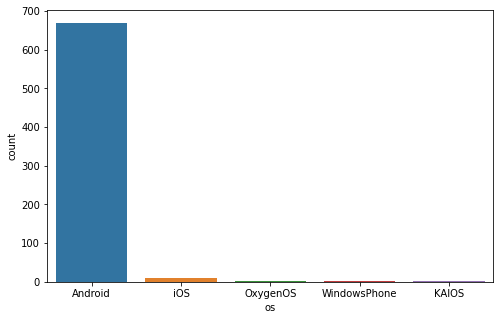

In [64]:
plt.figure(figsize = (8,5))
sns.countplot(df['os'])

Countplot() Show the counts of observations in each categorical bin using bars.

here we can observe that most of the mobiles belong to android OS
there were ver less  mobiles related to KAIOS , windowsphone , OXygenOS



> JOINT PLOT



<Figure size 720x576 with 0 Axes>

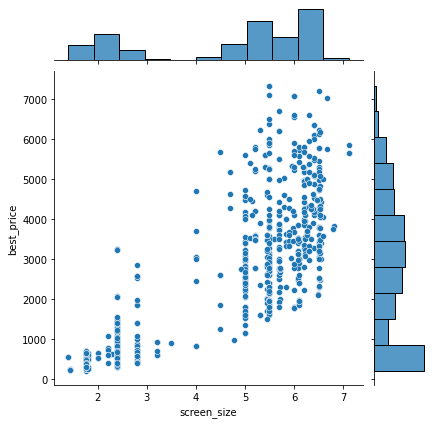

In [65]:
plt.figure(figsize=(10,8))
sns.jointplot(x = "screen_size", y = "best_price",kind = "scatter", data = df)


jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

best_price and screen_size are highly corelated.



>REGRESSION PLOT



Text(0.5, 1.0, 'highest_price vs lowest_price\n')

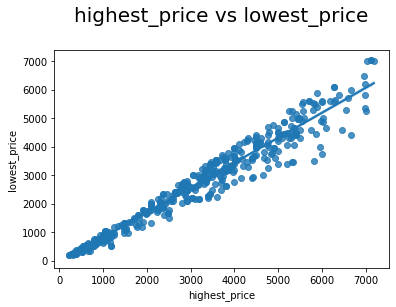

In [66]:
sns.regplot(x='highest_price', y='lowest_price', data=df)
plt.title('highest_price vs lowest_price\n', fontsize=20)

Creates a regression line between 2 parameters and helps to visualize their linear relationships.

Here highest_price and lowest_price are highly positively corelated



> DIST PLOT



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.7500529642332436

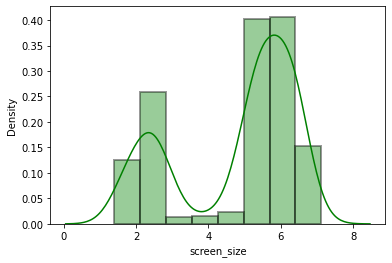

In [67]:
sns.distplot(df['screen_size'],color='green', hist_kws=dict(edgecolor="black", linewidth=2))
df['screen_size'].skew()


The distplot figure factory displays a combination of statistical representations of numerical data.

here mobiles with screen size 6 has more density then other sizes.



> BAR PLOT



Text(0, 0.5, 'COUNT')

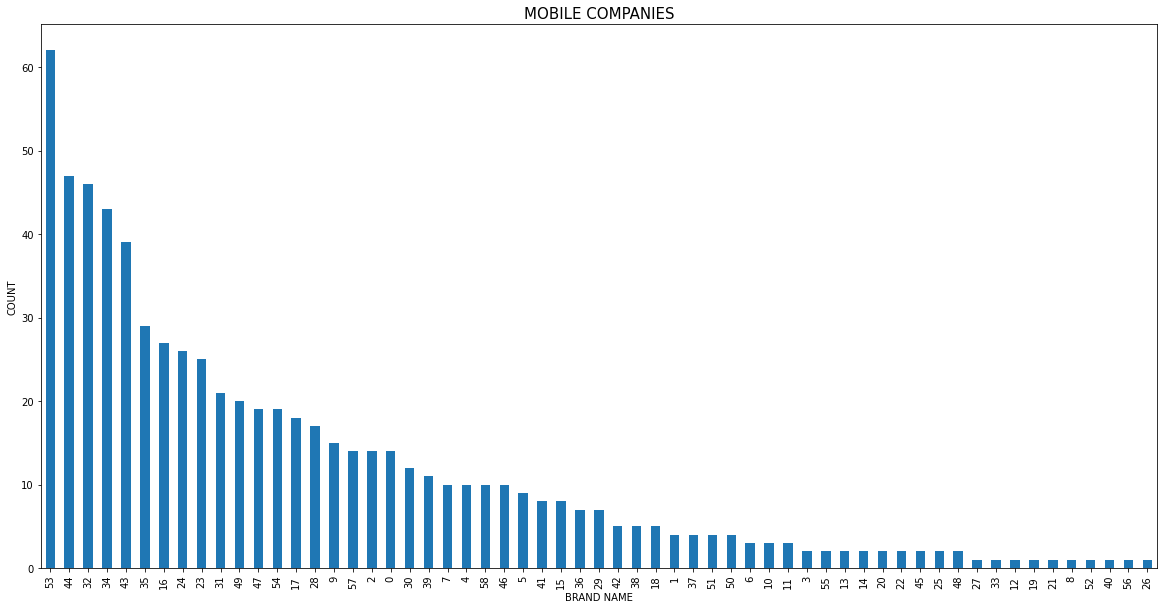

In [68]:
cnt = df['brand_name'].unique()
k= len(cnt)
plt.figure(figsize=(20,10))
a = plt.title('MOBILE COMPANIES', fontsize=15)
df['brand_name'].value_counts().head(k).plot.bar(a)
plt.xlabel('BRAND NAME')
plt.ylabel('COUNT')
#mobile company 53 has released more mobiles 

Bar charts can be plotted vertically or horizontally. A vertical bar chart is often called a column chart. When we arrange bar charts in a high to low-value counts manner, we called them Pareto charts.

From the above bar plot ,The length and heights of the bar chart represent the data distributed in the dataset. In an above bar chart, we have x-axis representing a brand_name and y-axis representing the values or counts associated with it.Here the brand name 53 is the highest count then compare to the other brands.

#EXPLORATARY DATA ANALYSIS



> HEAT MAP



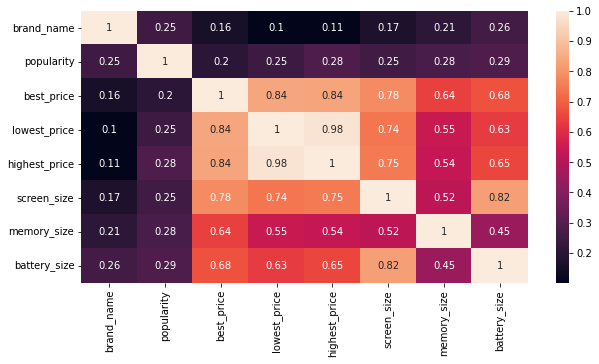

In [69]:
plt.figure(figsize=(10,5))
fig = df.corr()
sns.heatmap(fig, annot=True)

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column.

Here Corelation between same attributes are 1,which is highly positive and has represented in cream color block whereas memory_size and brand_name and lowest_price has least correlation i.e 0.1,Which is represent in dark black block.



> PIE CHART



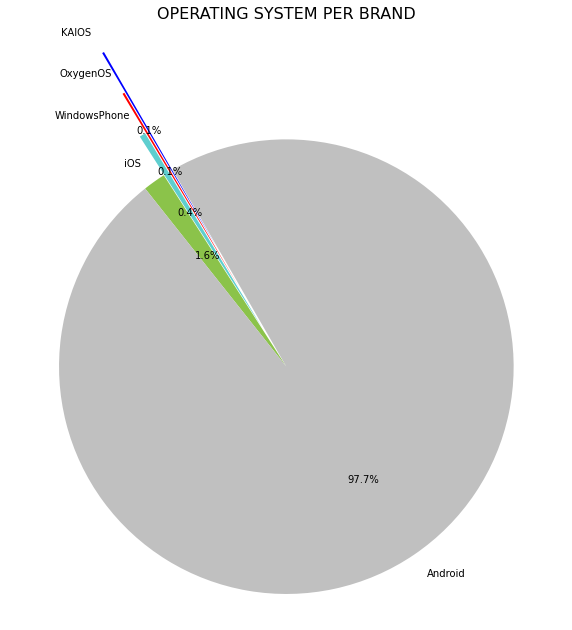

In [70]:
x = df.groupby('os').agg('count')
labels = x.model_name.sort_values().index 
sizes= x.brand_name.sort_values()
colors = ['#0000FF','#FF0000','#5ECECF','#8BC34A','#C0C0C0']
plt.figure(figsize=(10,11))
explode = [0.6,0.4,0.2,0,0]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=120,explode=explode)
plt.axis('equal')
plt.title("OPERATING SYSTEM PER BRAND", fontsize=16)
plt.show()

A pie chart is a type of data visualization that is used to illustrate numerical proportions in data. Pie charts typically show relative proportions of different categories in a data set.

Here we obtained pie chart on bases of type of operating system. Here 97.7% phones has Android as os. Like that we are having 1.6%, 0.4%, 0.1%, 0.1% for IOS, WindowsPhone,OxygenOS,Kaios.



> SWARM PLOT



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; yo

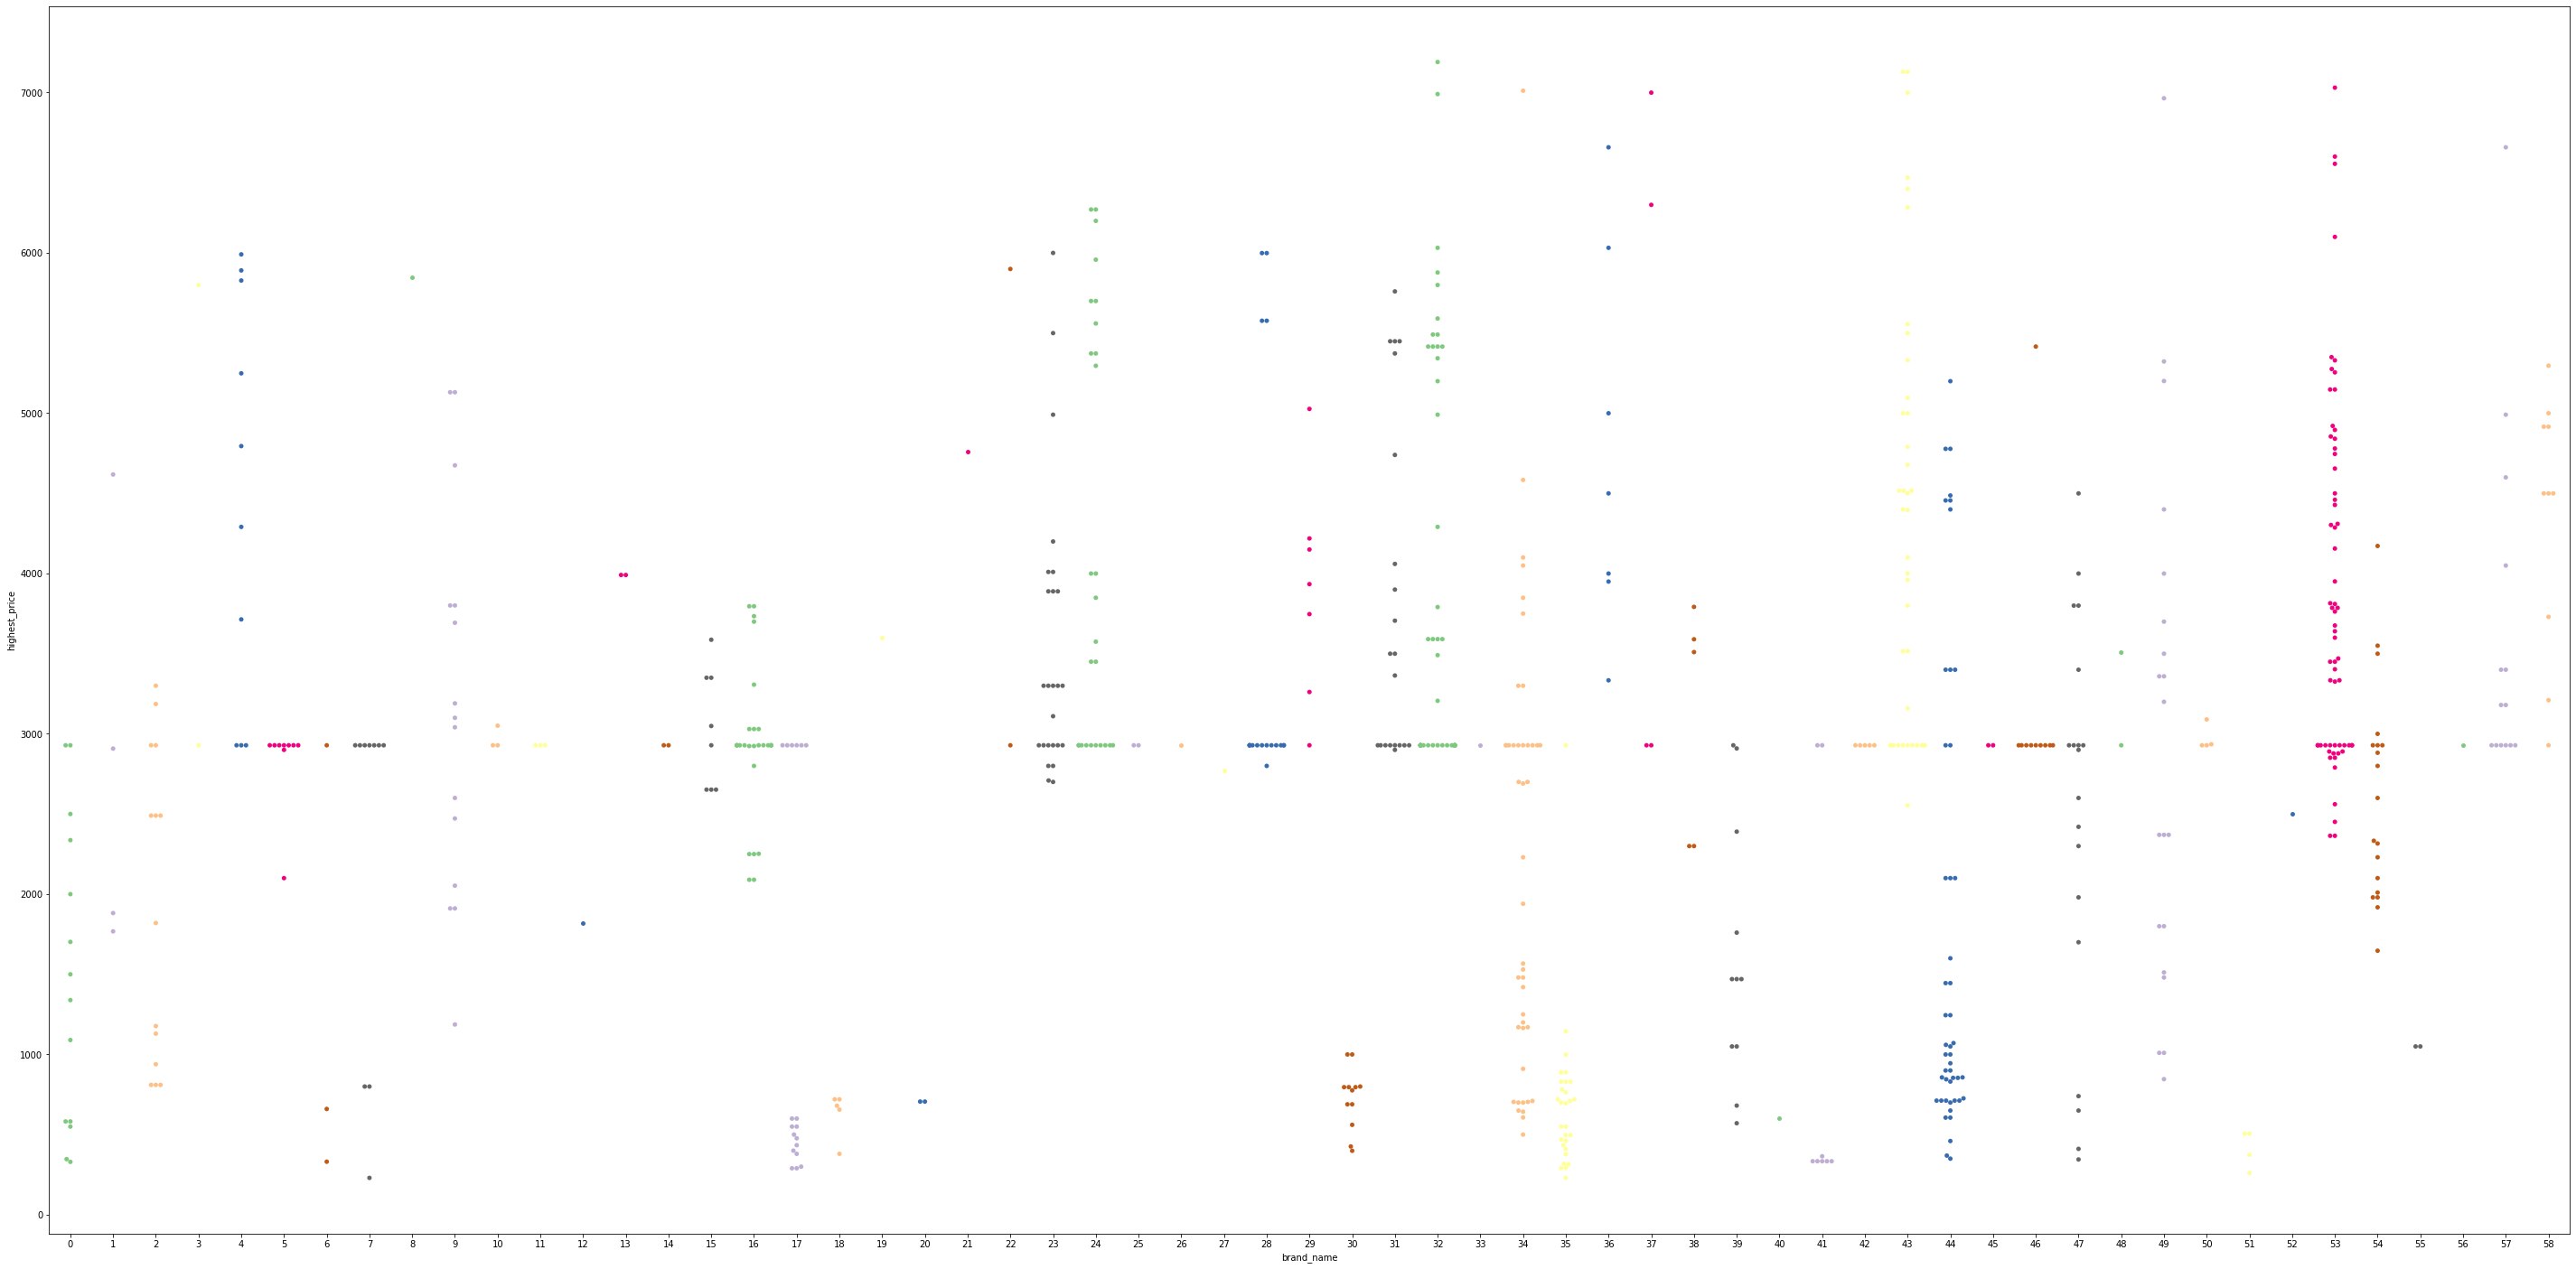

In [71]:
plt.figure(figsize=(50,25))
sns.swarmplot(x=df.brand_name,y=df.highest_price,palette='Accent')

swarm plot is another way of plotting the distribution of an attribute or the joint distribution of a couple of attributes.

Here we used for the brand_name and highest_price.The x-axis is brand_name and y-axis is highest_price.For many brands at high price i.e around 3000 multiple models of their respective brands available.



> VIOLIN PLOT



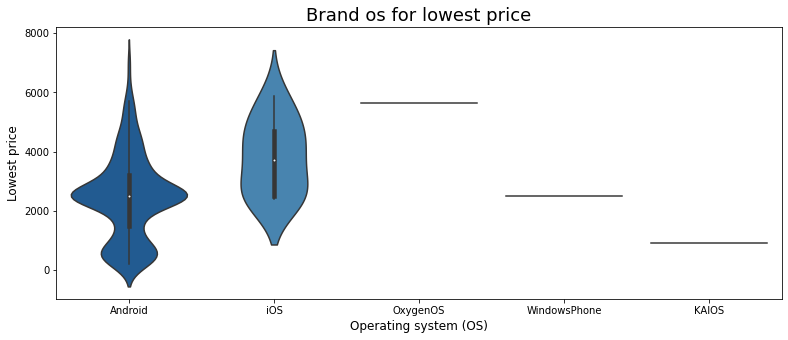

In [72]:
plt.figure(figsize=(13,5))
sns.violinplot(x='os', y='lowest_price', data=df,palette='Blues_r')
plt.title('Brand os for lowest price', size='18')
plt.ylabel('Lowest price',size=12)
plt.xlabel('Operating system (OS)',size=12)
plt.show()

It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

Here average lowest_price of Android os mobile will be around 2500.and for iOS it's been around 4000. For remaining operating system mobiles there hasn't been any violin plot because as their count is very less.





> STRIP PLOT



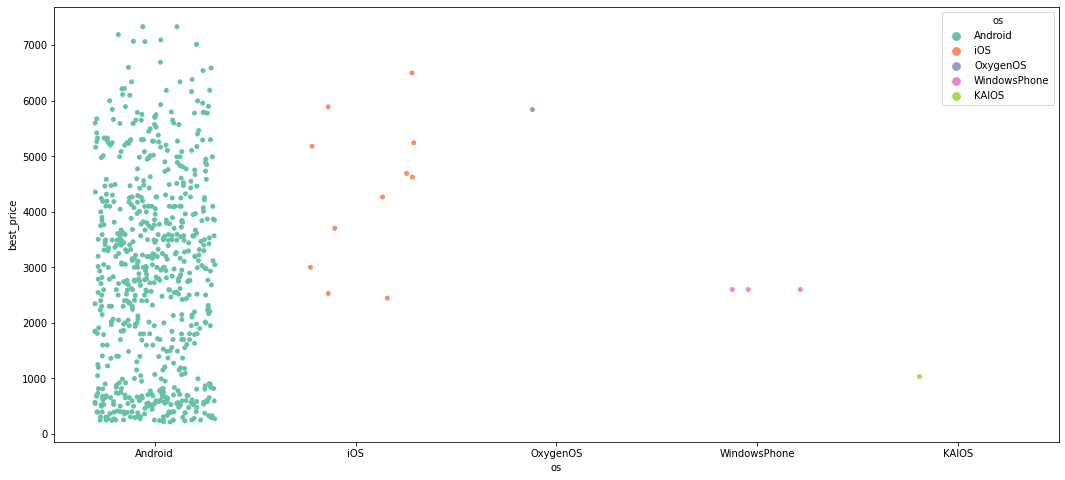

In [73]:
plt.figure(figsize=(18, 8))
sns.stripplot(x = df.os, palette="Set2", y = df.best_price , jitter = 0.3, hue = df.os)

A strip plot is a scatter plot where one of the variables is categorical.In a strip-plot design,the whole available area is divided into a horizontal strips and b vertical strips

From this plot we can visualise that the x-axis is having types of OS and the Y-axis is having best_price. Here the best_price for Android OS is more as compared to remaining OS. For example if i wanted to buy a phone with minimum cost . Then at first we will be checking Type of OS that is configured in it and the cost of it . I will be going to each and every phone.Atlast we will be chosing the phone with best_price and required no.of features.



> PAIR PLOT



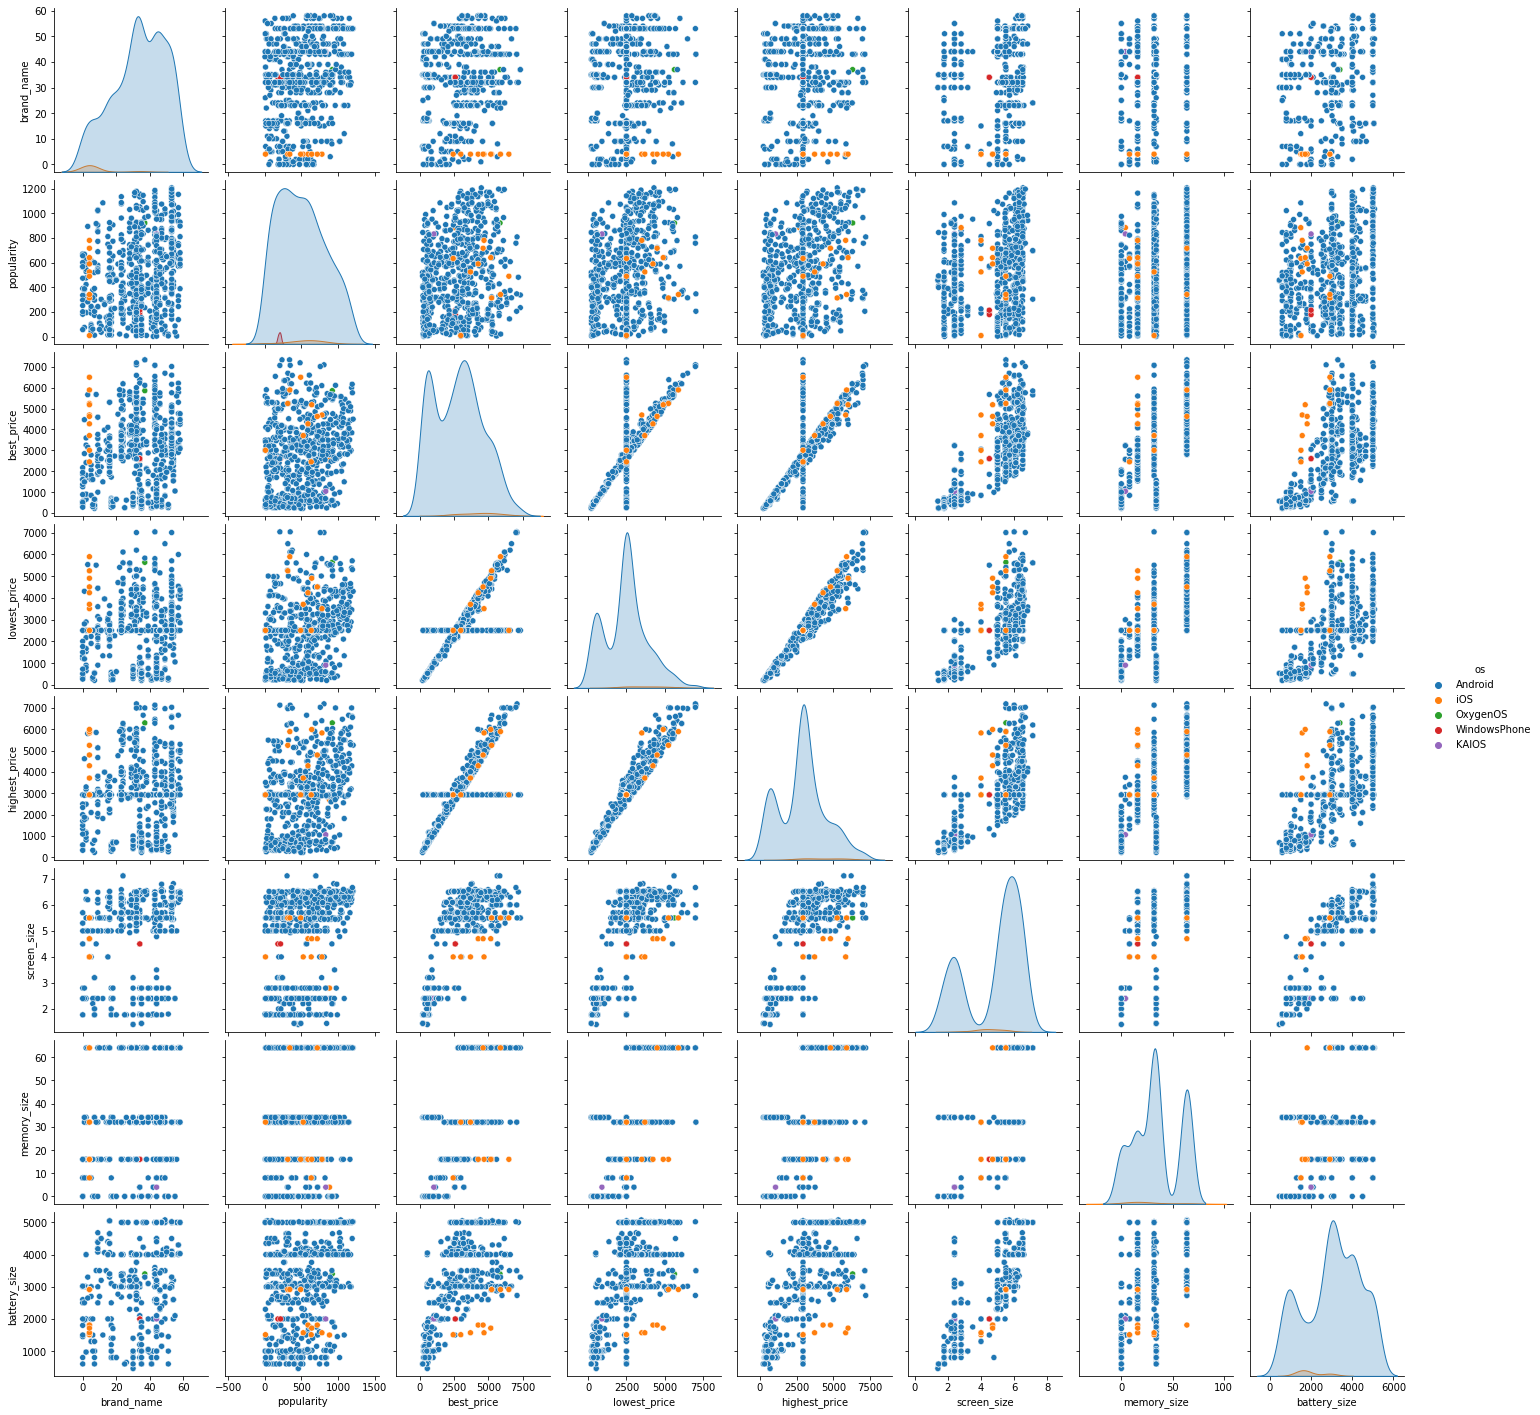

In [74]:
numericals   = df.dtypes[(df.dtypes!='O') & (df.dtypes!='<M8[ns]')].index.tolist()
by_col = 'os'
sns.pairplot(df[numericals + [by_col]], hue=by_col)
plt.show()

A Pairplot plot a pairwise relationships in a dataset. The Pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below. Here comparision between different dimensions given above.

Here in popularity vs battery size in 0 to 1000 popularity Majority phones were Andriod distrubuted across all ranges of battery and remaining operating system phones were distrubuted in 0 to 1000 windows os and kaios phones have battery of in range 2000 units. Oxygen os phones have battery size in range 3000 to 4000. Ios os phones have battery size in range 1000 and 3000.
Here in popularity vs popularity as every x point would be equal to it's respective y point. So the result will be a curve for Android os phones and different curves can be seen for different os phones.

In [75]:
df.to_csv("smartphone_preprocessed_data.csv",index=False)

After the Preprocessing the data we are loading the dataset into "**smartphone_preprocessed_data.csv**"

In [78]:
df1= pd.read_csv('/content/smartphone_preprocessed_data.csv')
df1

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,2,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529.000000,1819.000000,5.00,8.000000,2000.0,Oct-20
1,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
2,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
3,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,Sep-20
4,34,1.3 1/16GB Charcoal,Android,1047,1999,2498.449799,2927.672691,5.71,16.000000,3000.0,Apr-20
...,...,...,...,...,...,...,...,...,...,...,...
680,4,iPhone 6 Plus 16GB (Silver),iOS,313,5242,5239.000000,5248.000000,5.50,16.000000,2915.0,Sep-14
681,4,iPhone 6 Plus 64GB Space Gray (MGAH2),iOS,341,5889,5889.000000,5890.000000,5.50,64.000000,2915.0,Sep-14
682,4,iPhone 6s 16GB Space Gray (MKQJ2),iOS,640,5181,4899.000000,5990.000000,4.70,16.000000,1715.0,Sep-15
683,4,iPhone 6s Plus 16GB Space Gray (MKU12),iOS,489,6500,2498.449799,2927.672691,5.50,16.000000,2915.0,Sep-15


In [79]:
df1.isnull().sum()

brand_name       0
model_name       0
os               0
popularity       0
best_price       0
lowest_price     0
highest_price    0
screen_size      0
memory_size      0
battery_size     0
release_date     0
dtype: int64

In [80]:
df1.dtypes

brand_name         int64
model_name        object
os                object
popularity         int64
best_price         int64
lowest_price     float64
highest_price    float64
screen_size      float64
memory_size      float64
battery_size     float64
release_date      object
dtype: object

In [81]:
df1.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,2,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529.000000,1819.000000,5.00,8.0,2000.0,Oct-20
1,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659.000000,2489.000000,5.00,16.0,2000.0,Sep-20
2,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659.000000,2489.000000,5.00,16.0,2000.0,Sep-20
3,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659.000000,2489.000000,5.00,16.0,2000.0,Sep-20
4,34,1.3 1/16GB Charcoal,Android,1047,1999,2498.449799,2927.672691,5.71,16.0,3000.0,Apr-20


In [82]:
label_encoder = LabelEncoder()
df1['model_name']= label_encoder.fit_transform(df1['model_name'])
df1['os']= label_encoder.fit_transform(df1['os'])
df1['release_date']= label_encoder.fit_transform(df1['release_date'])
df1.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,2,0,0,422,1690,1529.000000,1819.000000,5.00,8.0,2000.0,64
1,2,1,0,323,1803,1659.000000,2489.000000,5.00,16.0,2000.0,72
2,2,1,0,299,1803,1659.000000,2489.000000,5.00,16.0,2000.0,72
3,2,1,0,287,1803,1659.000000,2489.000000,5.00,16.0,2000.0,72
4,34,2,0,1047,1999,2498.449799,2927.672691,5.71,16.0,3000.0,5


# SPLIT INTO TRAIN AND TEST DATA

In [83]:
X = df1.drop(labels=['brand_name'],axis=1)
y=df1['brand_name']

In [84]:
X

,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,0,0,422,1690,1529.000000,1819.000000,5.00,8.000000,2000.0,64
1,1,0,323,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,72
2,1,0,299,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,72
3,1,0,287,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,72
4,2,0,1047,1999,2498.449799,2927.672691,5.71,16.000000,3000.0,5
...,...,...,...,...,...,...,...,...,...,...
680,571,4,313,5242,5239.000000,5248.000000,5.50,16.000000,2915.0,66
681,572,4,341,5889,5889.000000,5890.000000,5.50,64.000000,2915.0,66
682,573,4,640,5181,4899.000000,5990.000000,4.70,16.000000,1715.0,67
683,574,4,489,6500,2498.449799,2927.672691,5.50,16.000000,2915.0,67


In [85]:
y

0       2
1       2
2       2
3       2
4      34
       ..
680     4
681     4
682     4
683     4
684    44
Name: brand_name, Length: 685, dtype: int64

In [86]:
#spliting data to train and test by 80% and 20% respectievely 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [87]:
X_train.shape

(548, 10)

In [88]:
X_test.shape

(137, 10)

# **FEATURE SELECTION**

##Removing Duplicate Features

In [89]:
train_features_T = X_train.T
train_features_T.shape

(10, 548)

In [90]:
print(train_features_T.duplicated().sum())

0


In [91]:
unique_features = train_features_T.drop_duplicates(keep='first').T
unique_features.shape

(548, 10)

In [92]:
duplicated_features = [dup_col for dup_col in X_train.columns if dup_col not in unique_features.columns]
duplicated_features

[]

##Smote oversampling

Counter({53: 62, 44: 47, 32: 46, 34: 43, 43: 39, 35: 29, 16: 27, 24: 26, 23: 25, 31: 21, 49: 20, 47: 19, 54: 19, 17: 18, 28: 17, 9: 15, 2: 14, 57: 14, 0: 14, 30: 12, 39: 11, 7: 10, 46: 10, 58: 10, 4: 10, 5: 9, 41: 8, 15: 8, 36: 7, 29: 7, 38: 5, 42: 5, 18: 5, 37: 4, 1: 4, 50: 4, 51: 4, 11: 3, 6: 3, 10: 3, 48: 2, 14: 2, 13: 2, 20: 2, 45: 2, 25: 2, 55: 2, 22: 2, 3: 2, 33: 1, 12: 1, 40: 1, 56: 1, 8: 1, 26: 1, 19: 1, 21: 1, 52: 1, 27: 1})
Class=2, n=14 (2.044%)
Class=34, n=43 (6.277%)
Class=24, n=26 (3.796%)
Class=31, n=21 (3.066%)
Class=37, n=4 (0.584%)
Class=5, n=9 (1.314%)
Class=57, n=14 (2.044%)
Class=49, n=20 (2.920%)
Class=36, n=7 (1.022%)
Class=7, n=10 (1.460%)
Class=41, n=8 (1.168%)
Class=9, n=15 (2.190%)
Class=11, n=3 (0.438%)
Class=33, n=1 (0.146%)
Class=29, n=7 (1.022%)
Class=48, n=2 (0.292%)
Class=1, n=4 (0.584%)
Class=6, n=3 (0.438%)
Class=14, n=2 (0.292%)
Class=17, n=18 (2.628%)
Class=47, n=19 (2.774%)
Class=12, n=1 (0.146%)
Class=16, n=27 (3.942%)
Class=54, n=19 (2.774%)
Clas

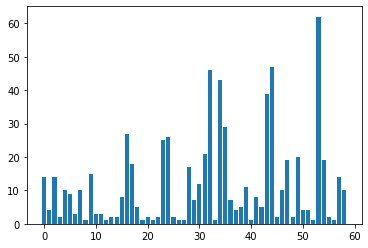

In [93]:
from collections import Counter
import matplotlib
import matplotlib.pyplot as pyplot
counter = Counter(y)
print(counter)

for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=2, n=60 (2.052%)
Class=34, n=58 (1.984%)
Class=24, n=60 (2.052%)
Class=31, n=58 (1.984%)
Class=37, n=58 (1.984%)
Class=5, n=60 (2.052%)
Class=57, n=61 (2.086%)
Class=49, n=59 (2.018%)
Class=36, n=58 (1.984%)
Class=7, n=60 (2.052%)
Class=41, n=59 (2.018%)
Class=9, n=60 (2.052%)
Class=11, n=60 (2.052%)
Class=33, n=1 (0.034%)
Class=29, n=58 (1.984%)
Class=48, n=59 (2.018%)
Class=1, n=60 (2.052%)
Class=6, n=60 (2.052%)
Class=14, n=60 (2.052%)
Class=17, n=60 (2.052%)
Class=47, n=59 (2.018%)
Class=12, n=1 (0.034%)
Class=16, n=60 (2.052%)
Class=54, n=61 (2.086%)
Class=38, n=58 (1.984%)
Class=42, n=59 (2.018%)
Class=44, n=59 (2.018%)
Class=13, n=60 (2.052%)
Class=10, n=60 (2.052%)
Class=28, n=58 (1.984%)
Class=32, n=58 (1.984%)
Class=39, n=58 (1.984%)
Class=0, n=60 (2.052%)
Class=18, n=60 (2.052%)
Class=43, n=59 (2.018%)
Class=40, n=1 (0.034%)
Class=56, n=1 (0.034%)
Class=8, n=1 (0.034%)
Class=15, n=60 (2.052%)
Class=26, n=1 (0.034%)
Class=30, n=58 (1.984%)
Class=53, n=62 (2.120%)
Class=

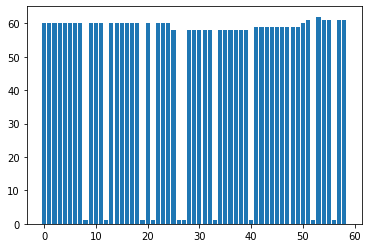

In [95]:
from imblearn.over_sampling import SMOTE
strategy = {0:60, 1:60, 2:60, 3:60, 4:60,5:60,6:60,7:60,16:60,15:60,23:60,24:60,28:58,29:58,30:58,31:58,32:58,34:58,25:58,43:59,44:59,47:59,49:59,50:60,35:58,36:58,37:58,38:58,39:58,41:59,42:59,45:59,46:59,9:60,17:60,18:60,51:61,54:61,57:61,58:61,22:60,11:60,55:61,20:60,10:60,13:60,14:60,48:59,8:1,33:1}
oversample = SMOTE(sampling_strategy = strategy, k_neighbors = 1)
X, y = oversample.fit_resample(df1, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## Variance threshold

In [96]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [97]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [98]:
X_train.columns[var_thres.get_support()]

Index(['model_name', 'os', 'popularity', 'best_price', 'lowest_price',
       'highest_price', 'screen_size', 'memory_size', 'battery_size',
       'release_date'],
      dtype='object')

In [99]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
constant_columns

[]

In [101]:
df1.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,2,0,0,422,1690,1529.000000,1819.000000,5.00,8.0,2000.0,64
1,2,1,0,323,1803,1659.000000,2489.000000,5.00,16.0,2000.0,72
2,2,1,0,299,1803,1659.000000,2489.000000,5.00,16.0,2000.0,72
3,2,1,0,287,1803,1659.000000,2489.000000,5.00,16.0,2000.0,72
4,34,2,0,1047,1999,2498.449799,2927.672691,5.71,16.0,3000.0,5


In [102]:
len(constant_columns)

0

In [103]:
X_train.drop(constant_columns,axis=1,inplace=True)
X_test.drop(constant_columns,axis=1,inplace=True)

In [104]:
df1

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,2,0,0,422,1690,1529.000000,1819.000000,5.00,8.000000,2000.0,64
1,2,1,0,323,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,72
2,2,1,0,299,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,72
3,2,1,0,287,1803,1659.000000,2489.000000,5.00,16.000000,2000.0,72
4,34,2,0,1047,1999,2498.449799,2927.672691,5.71,16.000000,3000.0,5
...,...,...,...,...,...,...,...,...,...,...,...
680,4,571,4,313,5242,5239.000000,5248.000000,5.50,16.000000,2915.0,66
681,4,572,4,341,5889,5889.000000,5890.000000,5.50,64.000000,2915.0,66
682,4,573,4,640,5181,4899.000000,5990.000000,4.70,16.000000,1715.0,67
683,4,574,4,489,6500,2498.449799,2927.672691,5.50,16.000000,2915.0,67


## Feature selection using Correlation

In [105]:
X_train.corr()

,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
model_name,1.000000,0.177029,-0.036695,-0.020178,-0.036677,-0.043144,-0.032479,-0.058175,0.059459,-0.056895
os,0.177029,1.000000,-0.008199,0.102067,0.106565,0.102060,-0.034249,-0.093465,-0.118669,0.132245
popularity,-0.036695,-0.008199,1.000000,0.192846,0.239666,0.276126,0.240779,0.265437,0.279729,0.050704
best_price,-0.020178,0.102067,0.192846,1.000000,0.849735,0.847661,0.774104,0.645050,0.672982,0.117311
lowest_price,-0.036677,0.106565,0.239666,0.849735,1.000000,0.980124,0.736624,0.537178,0.635379,0.145475
highest_price,-0.043144,0.102060,0.276126,0.847661,0.980124,1.000000,0.745253,0.531529,0.651412,0.127316
screen_size,-0.032479,-0.034249,0.240779,0.774104,0.736624,0.745253,1.000000,0.527103,0.819747,0.111739
memory_size,-0.058175,-0.093465,0.265437,0.645050,0.537178,0.531529,0.527103,1.000000,0.445354,0.064195
battery_size,0.059459,-0.118669,0.279729,0.672982,0.635379,0.651412,0.819747,0.445354,1.000000,-0.024691
release_date,-0.056895,0.132245,0.050704,0.117311,0.145475,0.127316,0.111739,0.064195,-0.024691,1.000000


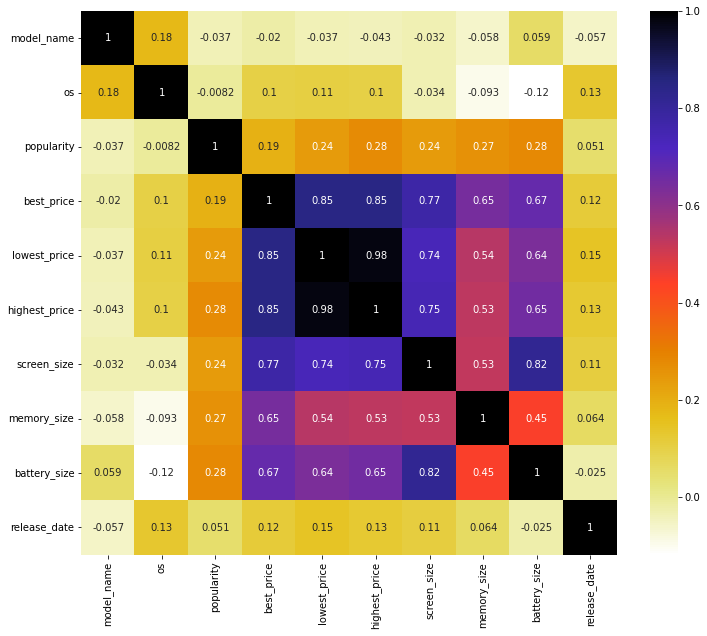

In [106]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [107]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [108]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [109]:
corr_features

{'battery_size', 'highest_price', 'lowest_price', 'screen_size'}

In [110]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,model_name,os,popularity,best_price,memory_size,release_date
113,87,0,334,359,0.032000,39
378,316,0,170,5790,32.000000,55
303,254,0,270,4100,32.000000,46
504,426,0,586,3957,64.000000,9
301,253,0,157,4268,16.000000,46
...,...,...,...,...,...,...
21,15,0,841,596,34.045947,28
454,382,0,654,4099,32.000000,58
506,428,0,89,5299,64.000000,16
500,422,0,557,3590,64.000000,58


## Feature selection using information gain - mutual information

In [111]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([2.545754  , 0.08244942, 0.22533612, 0.90683383, 0.8554805 ,
       0.77107701, 1.05725493, 0.63233078, 1.18497016, 0.60646923])

In [112]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

model_name       2.545754
battery_size     1.184970
screen_size      1.057255
best_price       0.906834
lowest_price     0.855481
highest_price    0.771077
memory_size      0.632331
release_date     0.606469
popularity       0.225336
os               0.082449
dtype: float64

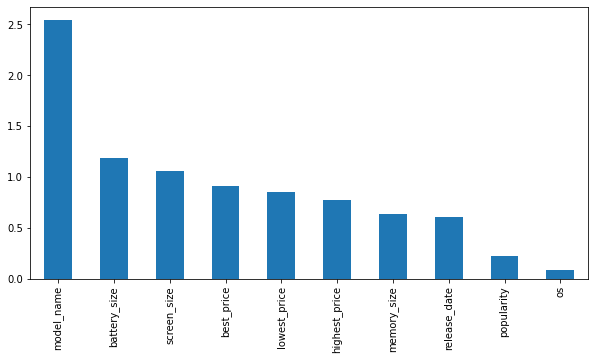

In [113]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (10, 5))

In [114]:
from sklearn.feature_selection import SelectKBest
sel_feat = SelectKBest(mutual_info_classif, k = 10)
sel_feat.fit(X_train, y_train)
X_train.columns[sel_feat.get_support()]

Index(['model_name', 'os', 'popularity', 'best_price', 'lowest_price',
       'highest_price', 'screen_size', 'memory_size', 'battery_size',
       'release_date'],
      dtype='object')

In [115]:
dd = pd.DataFrame(mutual_info).T
count=0
for i in dd.columns:
  if (dd[i][0] == 0.000):
    X_train.drop( i, axis=1, inplace = True)
    X_test.drop( i, axis=1, inplace = True)
X_train.shape

(548, 10)

**Feature Importance of Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Feature: 0, Score: -0.00095
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00289
Feature: 3, Score: -0.00629
Feature: 4, Score: -0.00004
Feature: 5, Score: 0.00191
Feature: 6, Score: 0.00003
Feature: 7, Score: -0.00059
Feature: 8, Score: 0.00330
Feature: 9, Score: 0.00043


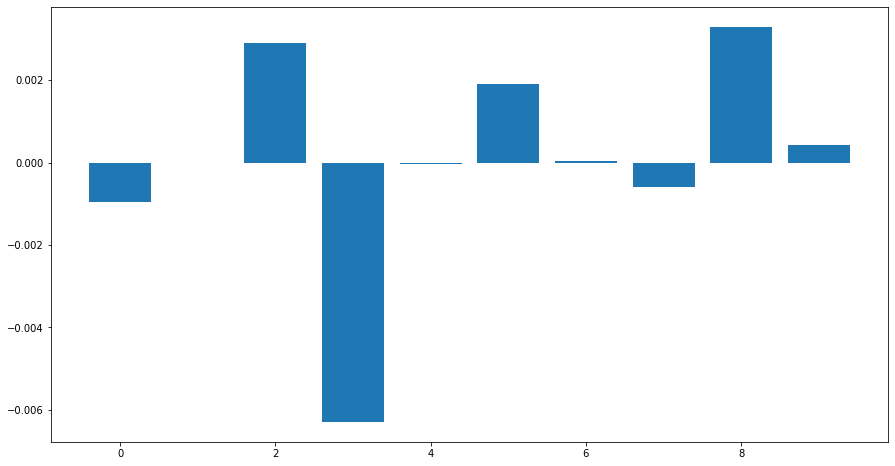

In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(15,8)) 
plt.bar([x1 for x1 in range(len(importance))], importance)
plt.show()

**Feature Importance of Decision Tree**

Feature: 0, Score: 0.60582
Feature: 1, Score: 0.00317
Feature: 2, Score: 0.03391
Feature: 3, Score: 0.06838
Feature: 4, Score: 0.03009
Feature: 5, Score: 0.01326
Feature: 6, Score: 0.09225
Feature: 7, Score: 0.03638
Feature: 8, Score: 0.05576
Feature: 9, Score: 0.06100


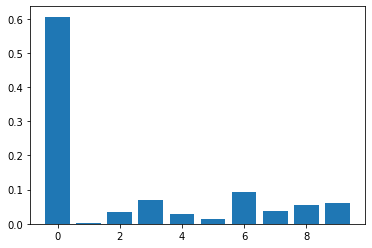

<Figure size 1080x864 with 0 Axes>

In [117]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x1 for x1 in range(len(importance))], importance)
plt.figure(figsize=(15,12)) 
plt.show()

**Feature Importance of Random Forest**

Feature: 0, Score: 0.33199
Feature: 1, Score: 0.00872
Feature: 2, Score: 0.08195
Feature: 3, Score: 0.10441
Feature: 4, Score: 0.07036
Feature: 5, Score: 0.07049
Feature: 6, Score: 0.09928
Feature: 7, Score: 0.04500
Feature: 8, Score: 0.10652
Feature: 9, Score: 0.08129


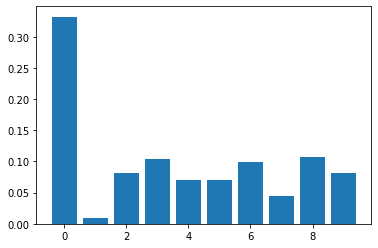

<Figure size 1080x1080 with 0 Axes>

In [118]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x1 for x1 in range(len(importance))], importance)
plt.figure(figsize=(15,15)) 
plt.show()

# MODELS 

**Accuracy score,Precision,Recall and F1score are  statistical measure of how well the data is fit to the classification lines**

**Accuracy_score**
*   The proportion of the total number of predictions that were correct
*   1 indicates a good accuracy and 0 indicates a bad accuracy

**Precision** 
*   The proportion of positive cases that were correctly identified.
*   If equal 0 then no positive cases in the input data, so any analysis of this case has no information, and so no conclusion about how positive cases are handled.There 1 gives the best result

**Recall** 
*   The proportion of actual positive cases which are correctly identified.
*   A model that produces no false negatives has a recall of 1.0. 
*   The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.



**f1 score**:
*   F1-Score is the harmonic mean of precision and recall values for a classification problem.
*   The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.






In [119]:
import warnings
warnings.filterwarnings('ignore')
classifiers = []
f1score=[]
accuracy=[]
recall=[]
precision=[]

##Logistic Regression

In [120]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
ypred1 = model1.predict(X_test)
print(ypred1)

[17 32 32 53 32 35 24 35 53 18 34 49 54 16 16 32 43 44 49 34 57 34 49 32
 43 53  0 24 16 34 53 16 47 49 53  9 54 32 53 34 24 44 32 46 35  4 17 53
 35 35 49 32 34 39 53 53 17 49 56 43 54 53 44 16  0 47 49 34  9 34 35 18
 24 47 16 34 34 53 44 53 32 53 35 32 54 23 16 53  0 53 34 32 53 34 24 53
 53  9  5 35 44  5 44 43 34 47 32 53 53 35 35 53  0 17 49 16 23 53 53 57
 34 16 43 34 35 30 49 17  5 35 47 53 34 53 16 53 43]


In [121]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred1))
print("Classification report :\n",classification_report(y_test,ypred1))
print("TRAIN ACCURACY :",accuracy_score(y_train,model1.predict(X_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred1))

classifiers.append(model1)
accuracy.append(accuracy_score(y_test, ypred1))
f1score.append(f1_score(y_test, ypred1,average='weighted'))
recall.append(recall_score(y_test, ypred1,average='weighted'))
precision.append(precision_score(y_test, ypred1,average='weighted'))

Confussion matrix :
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Classification report :
               precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.33      0.33      0.33         3
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.30      0.60      0.40         5
          17       0.80      0.57      0.67         7
          18       0.00      0.00      0.00         1
          21       0.00

## Decision Tree

In [122]:
model4 = tree.DecisionTreeClassifier(max_depth = 3,random_state=1,criterion='entropy')
model4.fit(X_train,y_train)
ypred4 = model4.predict(X_test)
print(ypred4)

[54 32 32 47 32 47 34 47 53 44 34 54 54 47 44 54 32  0 32 34 54 34 54 47
 32 53 47 34 47 34 35 44 54 32 35 54 34 32 53 54 34  0 32 47 47 35  0 53
 47 44 54 32 34 44 53 35  0 34 32 53 54 53  0 44 54 54 32 32 34 34 35 44
 54 53  0 34 34 35 35 32 53 35 44 32 54  0 47 32  0 32 34 53 32 34 34 32
 53 34 54 44 47  0 53 32 34 53 32 53 53 35 47 53  0  0 34 47 35 32 32 32
 34 32 32 34 35  0 54  0 54 35 54 47 34 53 47 47 34]


In [123]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred4))
print("Classification report :\n",classification_report(y_test,ypred4))
print("TRAIN ACCURACY :",accuracy_score(y_train,model4.predict(X_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred4))

classifiers.append(model4)
accuracy.append(accuracy_score(y_test, ypred4))
f1score.append(f1_score(y_test, ypred4,average='weighted'))
recall.append(recall_score(y_test, ypred4,average='weighted'))
precision.append(precision_score(y_test, ypred4,average='weighted'))

Confussion matrix :
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification report :
               precision    recall  f1-score   support

           0       0.08      0.33      0.12         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         7
          18       0.00      0.00      0.00         1
          21       0.00

In [124]:
feature_cols = X_train.columns.tolist()

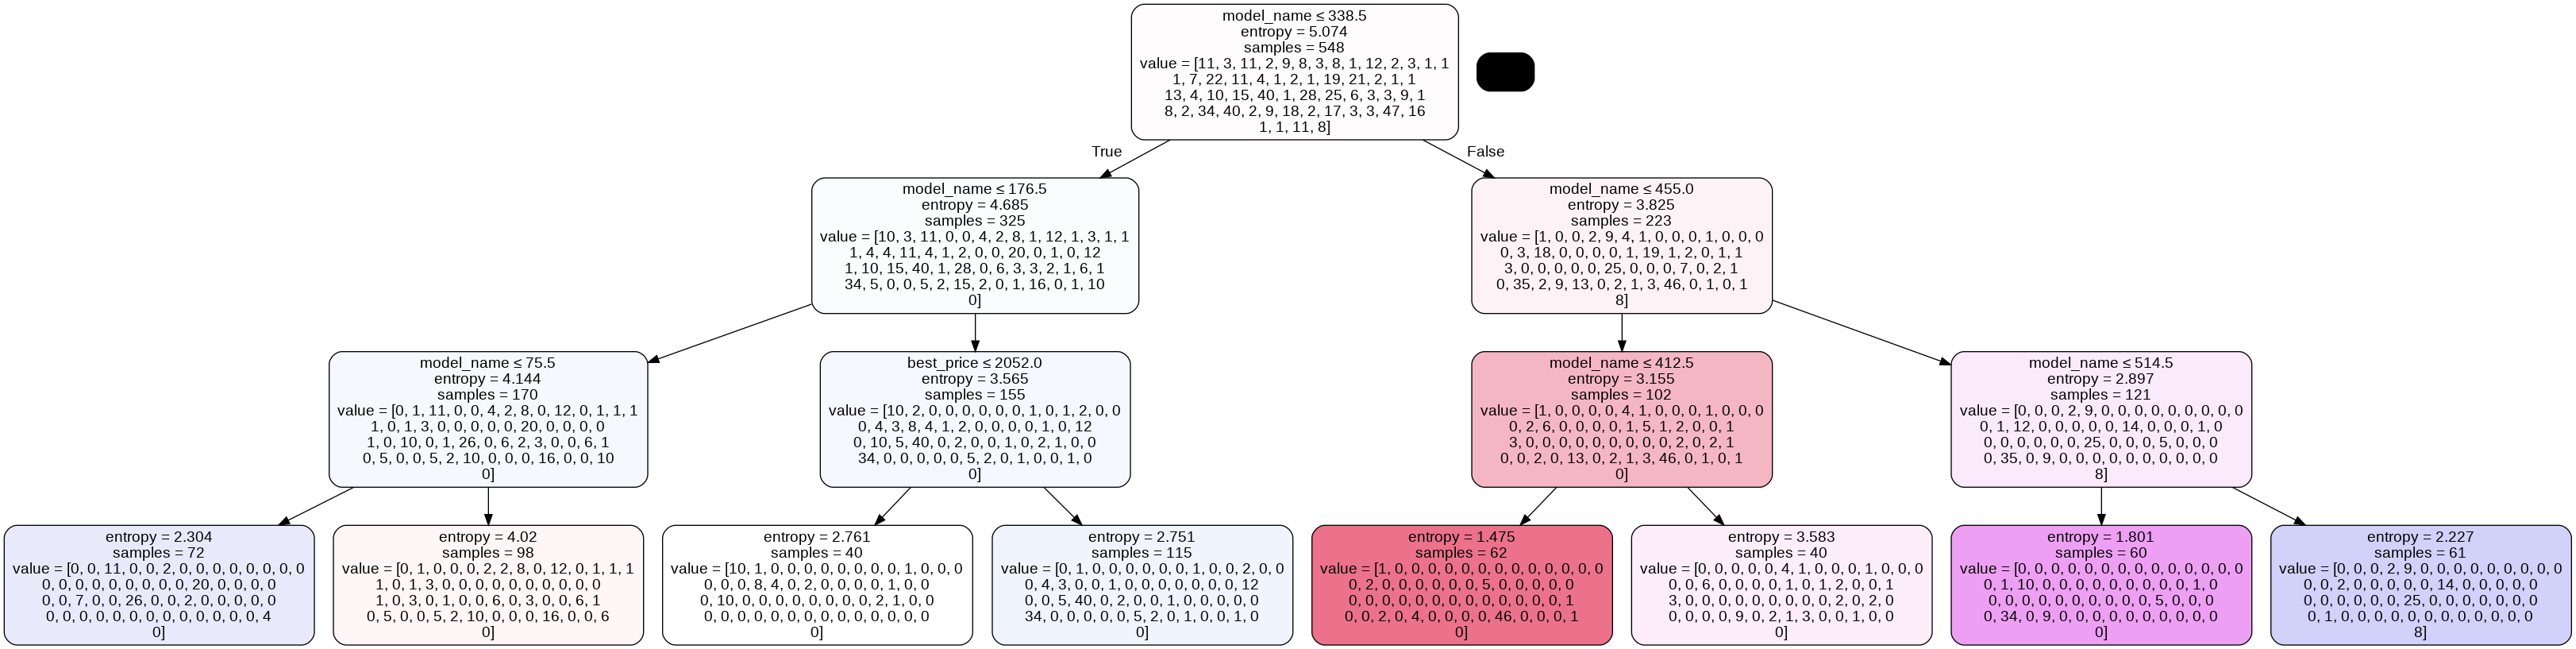

In [125]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
tree.export_graphviz(model4, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('smartphone.png')
Image(graph.create_png())

## Random Forest

In [126]:
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
ypred3 = model3.predict(X_test)
print(ypred3)

[ 7 32 43 29 43 41 24 51 53 44 34 16 54 47 44 24 32 17 31 34 57 24 49 24
 32 53 50 24 16 34 58 16 44 49 58  9 24 34 53 36 24 17 32 46  7  4 17 53
 44 44 31 32 34 39 23 23 17  2 32 32 54 53 17 44 49 38 31 43  2 34 35 44
 13 53  1 57 34 23 23 28 53 23 35 28 54 30  5 43 17 32 34 53 16 34 34 28
 53 34  7 44 55 10 53 28 34 53 32 53 53 35 51 53 31 17 34 16 23 31 32 32
  2 15 28 34 35 30 49 17 42 35  9  5 34 53 16 16 24]


In [127]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred3))
print("Classification report :\n",classification_report(y_test,ypred3))
print("TRAIN ACCURACY :",accuracy_score(y_train,model3.predict(X_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred3))

classifiers.append(model3)
accuracy.append(accuracy_score(y_test, ypred3))
f1score.append(f1_score(y_test, ypred3,average='weighted'))
recall.append(recall_score(y_test, ypred3,average='weighted'))
precision.append(precision_score(y_test, ypred3,average='weighted'))

Confussion matrix :
 [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           7       0.67      1.00      0.80         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       0.71      1.00      0.83         5
          17       0.88      1.00      0.93         7
          18       0.00      0.00      0.00         1
          21       0.00

## Support Vector Machine

In [128]:
model6 = svm.SVC()
model6.fit(X_train,y_train)
ypred6 = model6.predict(X_test)
print(ypred6)

[34 32 32 53 32 34 53 35 53 44 35 16 44 53 16 53 53 35 53 32 53 32 53 43
 32 53 53 32 16 34 53 16 44 54 53 53 53 23 53 43 43 35 32 32 34 32 34 53
 35 35 53 32 34 54 43 53 44 34 32 32 54 53 35 16 44 16 53 53 53 35 35 44
 53 53 44 32 34 53 53 53 43 53 35 32 53 35 53 53 35 53 35 32 53 43 34 53
 53 53 34 35 44 54 53 53 35 53 53 53 53 35 35 53 54 34 35 53 53 53 53 32
 35 16 43 34 35 35 53 34 34 35 53 54 35 53 32 53 53]


In [129]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred6))
print("Classification report :\n",classification_report(y_test,ypred6))
print("TRAIN ACCURACY :",accuracy_score(y_train,model6.predict(X_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred6))

classifiers.append(model6)
accuracy.append(accuracy_score(y_test, ypred6))
f1score.append(f1_score(y_test, ypred6,average='weighted'))
recall.append(recall_score(y_test, ypred6,average='weighted'))
precision.append(precision_score(y_test, ypred6,average='weighted'))

Confussion matrix :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.43      0.60      0.50         5
          17       0.00      0.00      0.00         7
          18       0.00      0.00      0.00         1
          21       0.00

## Naive Bayes

In [130]:
model5 = GaussianNB()
model5.fit(X_train,y_train)
ypred5 = model5.predict(X_test)
print(ypred5)

[ 7 32 43 29 43 41 11  6 53 44 41 15 54 16 15  9 29 41 32 31 57 37  9 37
 32 53 11 24 16 39 23 16 17  5 58  9 31 34 53 36 37 41 32 37 41  4  1 53
 41  6 11 32 39 11 53 58  0  2 37 32 54 53 41 15  0 38 32 28  2  6 35 44
 24 53 39 57 34 23  5 28 53 23  6 32 54 30 10 43 18 28  2 53 29 34  6 28
 53 57  7 41  6 11 53 28  2 15 32 53 53 35  6 11 11 17  6 16 23 32 53 32
  2 15 37 39 35 30  9 17 42 41  9 16 41 53 16 53 31]


In [131]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred5))
print("Classification report :\n",classification_report(y_test,ypred5))
print("TRAIN ACCURACY :",accuracy_score(y_train,model5.predict(X_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred5))

classifiers.append(model5)
accuracy.append(accuracy_score(y_test, ypred5))
f1score.append(f1_score(y_test, ypred5,average='weighted'))
recall.append(recall_score(y_test, ypred5,average='weighted'))
precision.append(precision_score(y_test, ypred5,average='weighted'))

Confussion matrix :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.60      1.00      0.75         3
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         2
           9       0.40      0.67      0.50         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.20      1.00      0.33         1
          16       0.50      0.60      0.55         5
          17       0.67

## K Neighbors

In [132]:
model2 = neighbors.KNeighborsClassifier()
model2.fit(X_train,y_train)
ypred2 = model2.predict(X_test)
print(ypred2)

[ 7 23 28 24 43  7 24 35 23 44 34 44  0 16 16 53 32 34 53 24 57 43 43 43
  9 53 45 24 16 34 15 16 39 49 53 53 54  4 53 32 43 17 32 46  7  4 17 23
 20 35 24 34 39 54 32 53  0  2 43  1 54 53 17 16 44 53 15 23  2 34 35 44
 53 53  1 57 34 53 53 24 32 53 20 24 53 30 24 36 17 32 34 43 23 43  2 53
 29  9  7 35 44  5 47 28 34 53 24 23 58 35 35 53  5  5 34 57 32 53 53 16
  2 11  3 34 35 20  9  5  5 35 53 49 34 44 16 47 32]


In [133]:
print("Confussion matrix :\n",confusion_matrix(y_test,ypred2))
print("Classification report :\n",classification_report(y_test,ypred2))
print("TRAIN ACCURACY :",accuracy_score(y_train,model2.predict(X_train)))
print("TEST ACCURACY :",accuracy_score(y_test,ypred2))

classifiers.append(model2)
accuracy.append(accuracy_score(y_test, ypred2))
f1score.append(f1_score(y_test, ypred2,average='weighted'))
recall.append(recall_score(y_test, ypred2,average='weighted'))
precision.append(precision_score(y_test, ypred2,average='weighted'))

Confussion matrix :
 [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         1
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.43      0.60      0.50         5
          17       0.75

## Evaluation metric

**Accuracy score graph**

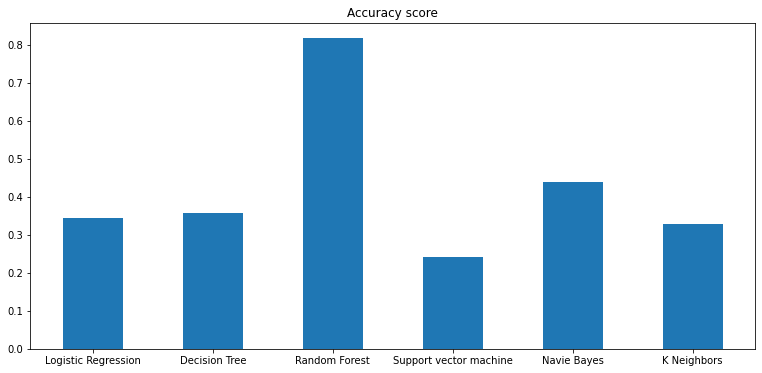

In [134]:
figure(figsize=(13, 6))
objects=('Logistic Regression','Decision Tree','Random Forest','Support vector machine','Navie Bayes','K Neighbors')
plt.bar(np.arange(len(accuracy)),accuracy, width=0.5)
plt.xticks(np.arange(len(accuracy)), objects)
plt.title('Accuracy score')
plt.show()

**Classification report graph**

In [135]:
X=('Logistic Regression','Decision Tree','Random Forest','Support vector machine','Navie Bayes','K Neighbors')

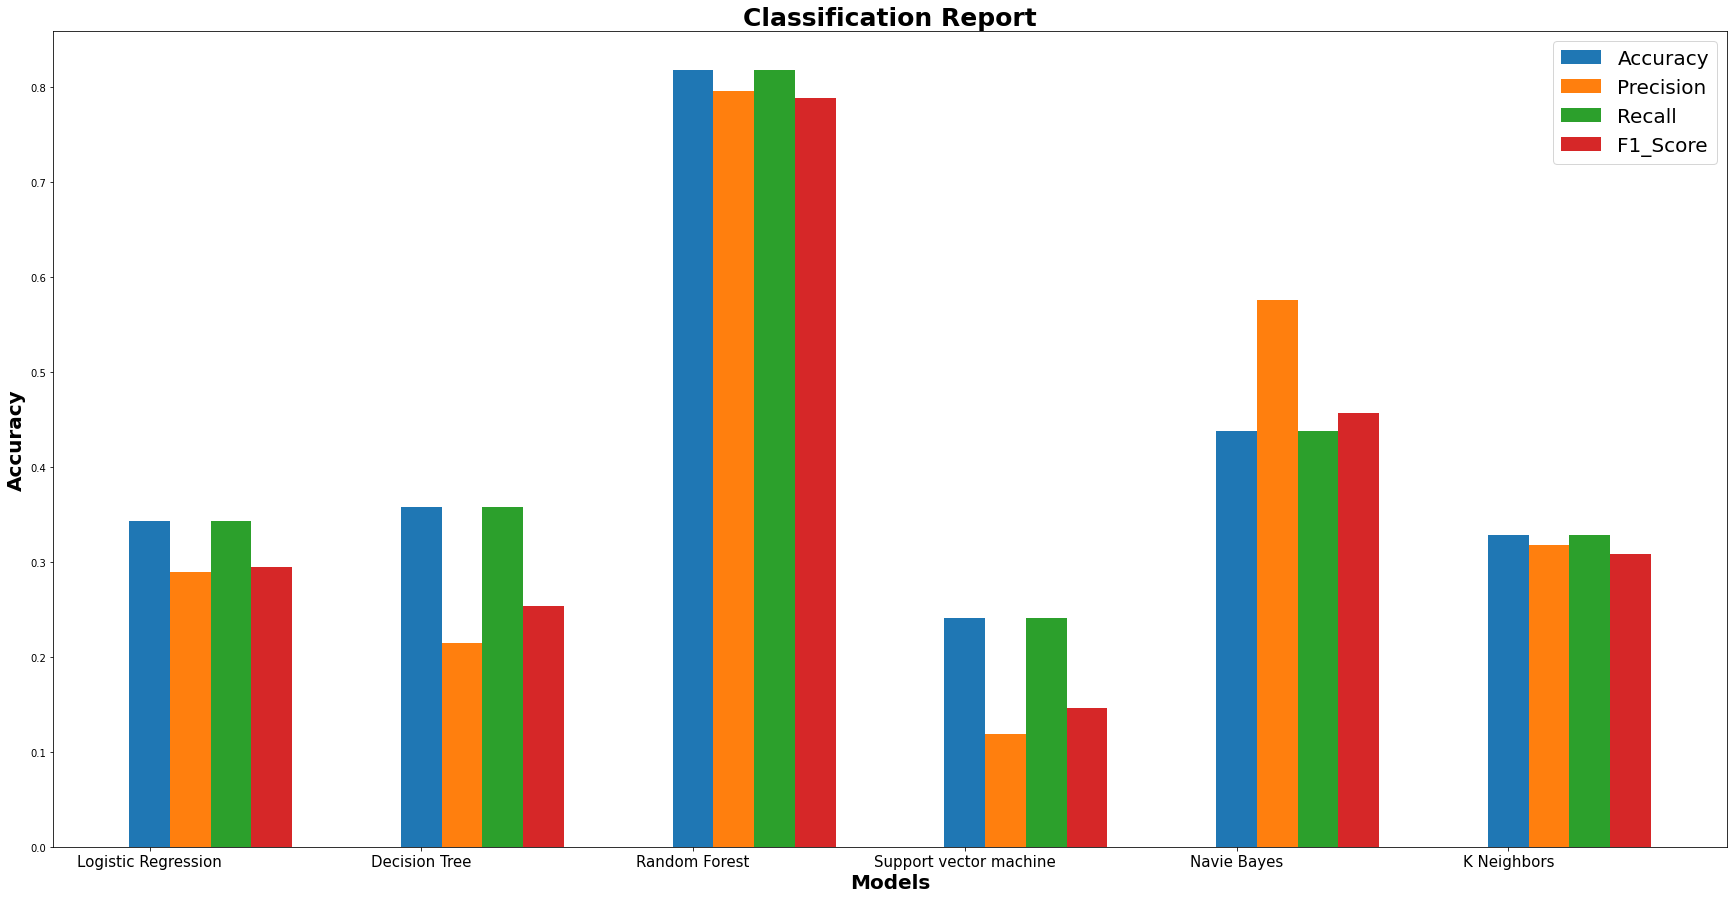

In [137]:
plt.figure(figsize=(30,15)) 

X_axis = np.arange(len(X))
barWidth = 0.15
# Set position of bar on X axis
pos1 = np.arange(len(X))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
  
plt.bar(pos1,accuracy,width=barWidth, label = 'Accuracy')
plt.bar(pos2,precision,width=barWidth, label = 'Precision')
plt.bar(pos3,recall,width=barWidth, label = 'Recall')
plt.bar(pos4,f1score,width=barWidth, label = 'F1_Score')
  
plt.xticks(X_axis, X,fontsize=15)
plt.xlabel("Models",fontweight='bold',fontsize=20)
plt.ylabel("Accuracy",fontweight='bold',fontsize=20)

plt.title("Classification Report",fontsize=25,fontweight='bold')
plt.legend(loc='upper right',bbox_to_anchor=(1.0, 1.0),fontsize=20)
plt.show()

**K fold Cross Validation**

In [138]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = []
for i in classifiers :
    cv_results.append(cross_val_score(i, X_train,y_train, cv=cv,n_jobs=6))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['Logistic Regression','Decision Tree','Random Forest','Support vector machine','Navie Bayes','K Neighbors']})
print(cv_res)

   CrossValMeans  CrossValerrors               Algorithm
0       0.306667        0.028964     Logistic Regression
1       0.368620        0.053996           Decision Tree
2       0.753704        0.028242           Random Forest
3       0.166229        0.040262  Support vector machine
4       0.445354        0.050698             Navie Bayes
5       0.281212        0.043833             K Neighbors


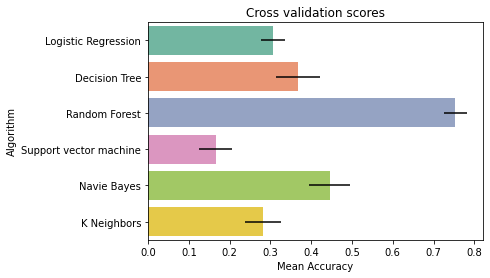

In [139]:
sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set2", orient="h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores");

#  PREDICTION

In [140]:
input_data = (2,0,1047,1999,2498,2927,5.71,16,3000,5)

input_data_as_numpy_array = np.asarray(input_data)
# RESHAPE THE NUMPY ARRAY BECAUSE WE ARE PREDICTING FOR ONE INSTANCE
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print('Label encoded value for Brand name is :',prediction)


Label encoded value for Brand name is : [34]


#CONCLUSION

***Logistic Regression***
*   Logistic regression tends to underperform when there are multiple or non-linear decision boundaries.


***Decision Tree***
*   Is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data. 
*   Feature selection happens automatically: unimportant features will not influence the result.
*   The presence of features that depend on each other (multicollinearity) also doesn't affect the quality.


***Random forest***
*   Requires requires much computational power as well as resources as it builds numerous trees to combine their outputs.
*   It also requires much time for training as it combines a lot of decision trees to determine the class.Due to the ensemble of decision trees.
*  It also suffers interpretability and fails to determine the significance of each variable.


***Support vector machine***
*  Algorithm is not suitable for large data sets.
*  As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification
*  Choosing a “good” kernel function is not easy

***Navie Bayes***
* This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distribute.

***K Neighbors***
*   Needs to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples.

**According to our dataset the Random Forest is the best classification model with highest accuracy value of 82%, along with high values of 79% for precision, 80% for recall ,78% for F1 score,the highest cross validation score of 0.760976 and the lowest cross validation error of  0.028516**.

# **HYPOTHESIS TESTING**

In [141]:
dataframe= pd.read_csv('/content/smartphone_preprocessed_data.csv')
dataframe.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,screen_size,memory_size,battery_size,release_date
0,2,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690,1529.000000,1819.000000,5.00,8.0,2000.0,Oct-20
1,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803,1659.000000,2489.000000,5.00,16.0,2000.0,Sep-20
2,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803,1659.000000,2489.000000,5.00,16.0,2000.0,Sep-20
3,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803,1659.000000,2489.000000,5.00,16.0,2000.0,Sep-20
4,34,1.3 1/16GB Charcoal,Android,1047,1999,2498.449799,2927.672691,5.71,16.0,3000.0,Apr-20


In [142]:
print("Population mean")
print(dataframe.mean())
print("\nPopulation sd")
print(dataframe.std())

Population mean
brand_name         33.141606
popularity        502.421898
best_price       2850.781022
lowest_price     2498.449799
highest_price    2927.672691
screen_size         4.778582
memory_size        34.045947
battery_size     3017.870778
dtype: float64

Population sd
brand_name         15.780812
popularity        317.503956
best_price       1753.428052
lowest_price     1409.789221
highest_price    1576.650424
screen_size         1.657932
memory_size        21.863720
battery_size     1331.515736
dtype: float64


In [143]:
s_ztest = dataframe.sample(n=60, random_state=1)
print("Sample mean",s_ztest['best_price'].mean())

Sample mean 3165.9666666666667


1.The average best price of smartphones is more than 2850.781 . A sample of 60 mobiles has a mean best price as 3165.967.The standard deviation of the population is 1753.428 . Is there enough evidence to support the claim at alpha = 0.05?

In [144]:
#H0 : μ =2850.781, Ha :  μ > 2850.781
n = 60
xbar = 3165.967
mu =  2850.781
sigma =1753.4280
alpha = 0.05

z_critical = abs(st.norm.ppf(alpha)) #Absolute value taken as the it's a right-tailed test and the original value will be negative
print("Z critical : ",z_critical)

z = (xbar- mu)/(sigma/np.sqrt(n))
print("Z : ",z)

if (z > z_critical): #Right-tailed test
    print("Reject null hypothesis")
else:
    print("Null hypothesis cannot be rejected")

Z critical :  1.6448536269514729
Z :  1.3923698366374113
Null hypothesis cannot be rejected


Inference: The null hypothesis is accepted.Hence there is no evidence to support that on an average the best price of the mobiles in a company is greater than 2850.781



2.mobiles which have an Android os has an average best price greater than 22825.145.A sample of 25 mobiles has a mean of best price as 3667.88 .and standard deviation of 1843.90. Is there enough evidence to support the claim at alpha = 0.01?

In [145]:
g=dataframe.groupby(['os'])
df1=g.get_group('Android')
print("population mean",df1['best_price'].mean())
s_ttest= df1.sample(n=25,random_state=1)
print("sample mean",s_ttest['best_price'].mean())
print("sample sd",s_ttest['best_price'].std())

population mean 2825.1449925261586
sample mean 3667.88
sample sd 1843.9079722155338


In [146]:
#H0 : μ = 2825.145, Ha : μ > 2825.145
n = 25
degrees_of_freedom = n-1
xbar =3667.88
mu = 2825.145
s = 1843.91
alpha = 0.01

t = (xbar - mu)/(s/np.sqrt(n))
print('t :',t)

p_val = (1 -st.t.cdf(abs(t),degrees_of_freedom) ) #"1 - cdf" because it's a right-tailed test
print('p_val :',p_val)

if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

t : 2.285184743290074
p_val : 0.015716908317985223
Null hypothesis cannot be rejected


INFERENCE: The null hypothesis is accepted. Hence there is no evidence to support the claim that mobiless who have android os has an average best price greater than 2825.145

3.Is there enough evidence to establish that there is no relationship between best price and the attribute brandname?


In [147]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
Final_crosstab = pd.crosstab(df1['best_price'], df1['brand_name'],margins=True)
Final_crosstab

brand_name,0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,All
best_price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
214,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [148]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    print (alpha)
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
	      print('Independent (fail to reject H0)')
    return expected
    print(alpha)

#null hypothesis = there is no relationship between best price and brand name
#alternate hypothesis = there is a relationship between best price  and brand name
exp_table_1 = check_categorical_dependency(Final_crosstab, 0.95)

Chi-Square Statistic value = 33919.10889052617
P - Value = 3.990013248213131e-114
0.050000000000000044
Dependent (reject H0)


INFERENCE: The null hpothesis is rejected. Hence it is proved that the attribute brand name and best price have a relationship between them.

4.mobile phones with battery size 2000 has an average best price of 1661.227. A sample of 15 mobiles has an average best price of 1846.0 and a standard deviation of 774.051. Is there enough evidence to support the claim at alpha = 0.05?

In [149]:
g2=dataframe.groupby(['battery_size'])
df2=g2.get_group(2000)
print("Population mean",df2['best_price'].mean())
s_ttest2= df2.sample(n=15,random_state=1)
print("sample mean",s_ttest2['best_price'].mean())
print("sample sd",s_ttest2['best_price'].std())

Population mean 1661.2272727272727
sample mean 1846.0666666666666
sample sd 774.0512595306285


In [150]:
#H0 : μ = 1661.227 , Ha : μ != 1661.227
n = 15
degrees_of_freedom = n-1
xbar =1846.0667
mu = 1661.227
s = 774.051
alpha = 0.05

t = (xbar-mu)/(s/np.sqrt(n))
print('t value =' ,t)

t_critical = st.t.ppf(alpha/2, degrees_of_freedom)
print('t_critical value is:',t_critical)

if (abs(t) > abs(t_critical)): #Absolute value taken as the it's a two-tailed test and the original t_critical value might be negative
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

t value = 0.9248500161074334
t_critical value is: -2.1447866879169277
Reject null hypothesis


INFERENCE: The null hypothesis is rejected. Hence there is a evidence to prove that mobiles with batterysize 2000 has an average bestprice which is different from 1661.227

5.Is there any enough evidence to claim to establish relationship between model name and bestprice.

In [151]:
Final_crosstab2 = pd.crosstab(df1['model_name'], df1['best_price'],margins=True)
Final_crosstab2

best_price,214,220,235,241,249,252,272,273,275,279,294,299,301,303,308,311,314,326,328,335,359,366,373,374,379,387,391,392,394,395,398,399,400,413,444,460,474,477,480,499,...,5590,5599,5600,5649,5652,5663,5674,5699,5713,5749,5754,5777,5790,5798,5844,5893,5899,5930,5957,5997,5999,6098,6112,6164,6186,6215,6222,6340,6381,6542,6590,6600,6692,7014,7064,7071,7094,7190,7333,All
model_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1 1/8GB Bluish Black (5033D-2JALUAA),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1 5033D 1/16GB Volcano Black (5033D-2LALUAF),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1.3 1/16GB Charcoal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10 Lite 3/32GB Blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10 Lite 4/64GB Black,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
i284 Red,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
i284 Violet-blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
i285 X-Treme Black-Yellow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [152]:
#null hypothesis = there is no relationship between best_price and model_name
#alternate hypothesis = there is a relationship between best_price and model_name
exp_table_2 = check_categorical_dependency(Final_crosstab2, 0.95)

Chi-Square Statistic value = 324464.9999999999
P - Value = 0.0
0.050000000000000044
Dependent (reject H0)


INFERENCE:The null hypothesis is rejected.Hence proved that there is relationship between bestprice and modelname.

6.The average highest_price of mobiles are less than 2927.672. A sample of 70 mobiles has a mean best price as 3012.815. The standard deviation of the population is 1576.650. Is there enough evidence to support the claim at alpha = 0.01?



In [153]:
s_ztest1= dataframe.sample(n=70, random_state=1)
print("Sample ztest mean",s_ztest1['highest_price'].mean())

Sample ztest mean 3012.8158347676417


In [154]:
#H0 : μ = 2927.672, Ha :  μ < 2927.672
n = 70
xbar = 3012.816
mu = 2927.672
sigma =1576.650
alpha = 0.01

z_critical = st.norm.ppf(alpha) #Absolute value is not taken as the it's a left-tailed test and the original value will be negative
print('z_critical value=',z_critical)

z = (xbar- mu)/(sigma/np.sqrt(n))
print('z value =',z)

if (z < z_critical): #left-tailed test
    print("Reject null hypothesis")
else:
    print("Null hypothesis cannot be rejected")

z_critical value= -2.3263478740408408
z value = 0.4518224165110655
Null hypothesis cannot be rejected


INFERENCE: The null hypothesis is accepted.Hence there is no evidence to prove that the average of highest price of the mobiles is than 2927.672.



7.Mobile phones with screensize 5 has an average lowest_price less than 2589.502. A sample of 20 mobiles has an average lowestprice of 2601.2674 and standard deviation of 725.8502. Is there enough evidence to support the claim at alpha = 0.01?

In [155]:
g1=dataframe.groupby(['screen_size'])
df3=g1.get_group(5)#screen size 5
print("Population mean",df3['lowest_price'].mean())
s_ttest1= df3.sample(n=20,random_state=1)
print("sample mean",s_ttest1['lowest_price'].mean())
print("sample sd",s_ttest1['lowest_price'].std())

Population mean 2589.501784917449
sample mean 2601.267469879518
sample sd 725.8501802877568


In [156]:
#H0 : μ = 2589.502, Ha : μ < 2589.502
n = 20
degrees_of_freedom = n-1
xbar =2601.267
mu = 2589.502
s = 725.8501
alpha = 0.01

t = (xbar-mu)/(s/np.sqrt(n))
print('t :',t)

t_critical = st.t.ppf(alpha, degrees_of_freedom)
print('t_critical value :',t_critical)

if (t > t_critical): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

t : 0.07248697700884726
t_critical value : -2.5394831906222888
Null hypothesis cannot be rejected


INFERENCE: The null hypothesis is accepted.Hence there is no evidence to prove that the mobile phones with screensize 5 has an average lowest price less than 2589.502.

8.Is there any enough evidence to prove the relation between lowestprice and bestprice

In [157]:
Final_crosstab3 = pd.crosstab(df1['lowest_price'], df1['best_price'],margins=True)
Final_crosstab3

best_price,214,220,235,241,249,252,272,273,275,279,294,299,301,303,308,311,314,326,328,335,359,366,373,374,379,387,391,392,394,395,398,399,400,413,444,460,474,477,480,499,...,5590,5599,5600,5649,5652,5663,5674,5699,5713,5749,5754,5777,5790,5798,5844,5893,5899,5930,5957,5997,5999,6098,6112,6164,6186,6215,6222,6340,6381,6542,6590,6600,6692,7014,7064,7071,7094,7190,7333,All
lowest_price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
198.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
199.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
209.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
218.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
219.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6486.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2


In [158]:
#null hypothesis = there is no relationship between lowest_price and best_price
#alternate hypothesis = there is a relationship between flowest_price and best_price
exp_table_4 = check_categorical_dependency(Final_crosstab3, 0.90)

Chi-Square Statistic value = 187712.28422821162
P - Value = 0.0
0.09999999999999998
Dependent (reject H0)


INFERENCE:The null hypothesis is rejected.Hence proved that there is relationship between lowest_price and best_price. Mobile phones with more lowest_price has less bestprice.similarly mobile with less lowestprice has more bestprice 

9.Is there any enough evidence to claim that there is a relationship between OS (Android,iOS) and bestprice.

In [159]:
a=dataframe.groupby(['os'])
x=a.get_group('Android')
x1=a.get_group('iOS')

In [160]:
Final_crosstab5 = pd.crosstab(x['os'], x['best_price'],margins=True)
Final_crosstab5

best_price,214,220,235,241,249,252,272,273,275,279,294,299,301,303,308,311,314,326,328,335,359,366,373,374,379,387,391,392,394,395,398,399,400,413,444,460,474,477,480,499,...,5590,5599,5600,5649,5652,5663,5674,5699,5713,5749,5754,5777,5790,5798,5844,5893,5899,5930,5957,5997,5999,6098,6112,6164,6186,6215,6222,6340,6381,6542,6590,6600,6692,7014,7064,7071,7094,7190,7333,All
os,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Android,1,1,1,2,4,5,2,1,1,1,2,2,1,1,2,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,3,1,3,1,1,1,2,1,1,4,...,2,1,1,1,2,1,1,1,1,1,1,2,3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,2,669
All,1,1,1,2,4,5,2,1,1,1,2,2,1,1,2,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,3,1,3,1,1,1,2,1,1,4,...,2,1,1,1,2,1,1,1,1,1,1,2,3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,2,669


In [161]:
exp_table_6 = check_categorical_dependency(Final_crosstab5, 0.95)

Chi-Square Statistic value = 0.0
P - Value = 1.0
0.050000000000000044
Independent (fail to reject H0)


In [162]:
Final_crosstab6 = pd.crosstab(x1['os'], x1['best_price'],margins=True)
Final_crosstab6

best_price,2445,2530,3000,3704,4266,4623,4691,5181,5242,5889,6500,All
os,,,,,,,,,,,,
iOS,1,1,1,1,1,1,1,1,1,1,1,11
All,1,1,1,1,1,1,1,1,1,1,1,11


In [163]:
exp_table_7 = check_categorical_dependency(Final_crosstab6, 0.95)

Chi-Square Statistic value = 0.0
P - Value = 1.0
0.050000000000000044
Independent (fail to reject H0)


INFERENCE:The null hypothesis is failure to rejected.Hence it is proved that there is no relationship between the atrribute os and the attribute best_price.